In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\mapoe004\Desktop\Arbeitsordner Maik Poetzsch\BCD\Bausteine\Anwendungsbausteine\a-energiedatenauswertung':
  os.chdir(r'C:\Users\mapoe004\Desktop\Arbeitsordner Maik Poetzsch\BCD\Bausteine\Anwendungsbausteine\a-energiedatenauswertung')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\mapoe004\AppData\Local\Temp\ipykernel_1272\2983278482.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap_external.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\zipimport.py": 1701984016.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\codecs.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\aliases.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\__init__.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\utf_8.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\cp1252.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\abc.py": 1701984014.0, "C:\\Users\\mapoe004\\AppData\\L

In [2]:
#| output: false

import pandas as pd
pd.set_option("display.precision", 2) # places after decimal for floats
import numpy as np
import matplotlib.pyplot as plt

installierte_leistung0 = pd.read_csv(filepath_or_buffer = \
"skript/01-daten/Installierte_Erzeugungsleistung_202301010000_202401010000_Jahr.csv", \
sep = ";", thousands = ".", decimal = ",", \
parse_dates =  [0, 1], date_format = "%d.%m.%Y")

erzeugung0 = pd.read_csv(filepath_or_buffer = \
"skript/01-daten/Realisierte_Erzeugung_202301010000_202401010000_Viertelstunde.csv", \
sep = ";", thousands = ".", decimal = ",", \
parse_dates =  [0, 1], date_format = "%d.%m.%Y %H:%M")

verbrauch0 = pd.read_csv(filepath_or_buffer = \
"skript/01-daten/Realisierter_Stromverbrauch_202301010000_202401010000_Viertelstunde.csv", \
sep = ";", thousands = ".", decimal = ",", \
parse_dates =  [0, 1], date_format = "%d.%m.%Y %H:%M")

In [3]:
#| include: true

import pandas as pd

erzeugung0_en = pd.read_csv(filepath_or_buffer = \
"skript/01-daten/english/Actual_generation_202301010000_202401010000_Quarterhour.csv", \
sep = ";", thousands = ",", decimal = ".", \
parse_dates =  [0, 1], date_format = "%b %d, %Y %I:%M %p") # leading zero is optional for formats %d, %m, %H, %I, %M, %S, %j, %U, %W, and %V

pd.concat([erzeugung0_en.head(2), erzeugung0_en.tail(2)])

Start date            End date  \
0     2023-01-01 00:00:00 2023-01-01 00:15:00   
1     2023-01-01 00:15:00 2023-01-01 00:30:00   
35038 2023-12-31 23:30:00 2023-12-31 23:45:00   
35039 2023-12-31 23:45:00 2024-01-01 00:00:00   

       Biomass [MWh] Original resolutions  \
0                                 1094.25   
1                                 1091.25   
35038                             1053.25   
35039                             1051.50   

       Hydropower [MWh] Original resolutions  \
0                                      320.0   
1                                      317.5   
35038                                  412.5   
35039                                  404.0   

       Wind offshore [MWh] Original resolutions  \
0                                        684.25   
1                                        743.50   
35038                                   1479.25   
35039                                   1469.00   

       Wind onshore [MWh] Original resolutions  \
0                                      7145.75   
1                                      7158.25   
35038                                  7544.25   
35039                                  7480.50   

       Photovoltaics [MWh] Original resolutions  \
0                                          0.50   
1                                          0.25   
35038                                      0.50   
35039                                      0.50   

       Other renewable [MWh] Original resolutions  \
0                                           32.25   
1                                           32.25   
35038                                       24.00   
35039                                       24.00   

       Nuclear [MWh] Original resolutions  Lignite [MWh] Original resolutions  \
0                                  615.25                              962.75   
1                                  614.75                              963.25   
35038                                0.00                              845.25   
35039                                0.00                              840.75   

       Hard coal [MWh] Original resolutions  \
0                                    517.00   
1                                    518.00   
35038                                444.50   
35039                                442.25   

       Fossil gas [MWh] Original resolutions  \
0                                     429.75   
1                                     429.50   
35038                                 683.00   
35039                                 679.00   

       Hydro pumped storage [MWh] Original resolutions  \
0                                                13.50   
1                                                 9.75   
35038                                           122.75   
35039                                            58.25   

       Other conventional [MWh] Original resolutions  
0                                             307.25  
1                                             307.25  
35038                                         348.50  
35039                                         348.00

In [4]:
#| include: true

print(f"Spalten:\n{erzeugung0.dtypes}")

Spalten:
Datum von                                            datetime64[ns]
Datum bis                                            datetime64[ns]
Biomasse [MWh] Originalauflösungen                          float64
Wasserkraft [MWh] Originalauflösungen                       float64
Wind Offshore [MWh] Originalauflösungen                     float64
Wind Onshore [MWh] Originalauflösungen                      float64
Photovoltaik [MWh] Originalauflösungen                      float64
Sonstige Erneuerbare [MWh] Originalauflösungen              float64
Kernenergie [MWh] Originalauflösungen                       float64
Braunkohle [MWh] Originalauflösungen                        float64
Steinkohle [MWh] Originalauflösungen                        float64
Erdgas [MWh] Originalauflösungen                            float64
Pumpspeicher [MWh] Originalauflösungen                      float64
Sonstige Konventionelle [MWh] Originalauflösungen           float64
dtype: object


In [5]:
#| include: true

# Zeichenkette " Originalauflösungen" entfernen
installierte_leistung0.columns = installierte_leistung0.columns.str.replace(pat = " Originalauflösungen", repl = "")

erzeugung0.columns = erzeugung0.columns.str.replace(pat = " Originalauflösungen", repl = "")
print(f"Spalten:\n{erzeugung0.dtypes}")

verbrauch0.columns = verbrauch0.columns.str.replace(pat = " Originalauflösungen", repl = "")

Spalten:
Datum von                        datetime64[ns]
Datum bis                        datetime64[ns]
Biomasse [MWh]                          float64
Wasserkraft [MWh]                       float64
Wind Offshore [MWh]                     float64
Wind Onshore [MWh]                      float64
Photovoltaik [MWh]                      float64
Sonstige Erneuerbare [MWh]              float64
Kernenergie [MWh]                       float64
Braunkohle [MWh]                        float64
Steinkohle [MWh]                        float64
Erdgas [MWh]                            float64
Pumpspeicher [MWh]                      float64
Sonstige Konventionelle [MWh]           float64
dtype: object


In [6]:
#| echo: true

# der DataFrame installierte_leistung0 hat nur 1 Zeile
installierte_leistung0

Datum von  Datum bis  Biomasse [MW]  Wasserkraft [MW]  Wind Offshore [MW]  \
0 2023-01-01 2024-01-01         8467.0            5049.0              8129.0   

   Wind Onshore [MW]  Photovoltaik [MW]  Sonstige Erneuerbare [MW]  \
0            57590.0            63066.0                      440.0   

   Kernenergie [MW]  Braunkohle [MW]  Steinkohle [MW]  Erdgas [MW]  \
0            4056.0          17692.0          18127.0      31808.0   

   Pumpspeicher [MW]  Sonstige Konventionelle [MW]  
0             9379.0                        8958.0

In [7]:
#| echo: true

pd.concat([erzeugung0.head(2), \
erzeugung0.iloc[len(erzeugung0)//2:(len(erzeugung0)//2+2)], \
erzeugung0.tail(2)])

Datum von           Datum bis  Biomasse [MWh]  \
0     2023-01-01 00:00:00 2023-01-01 00:15:00         1094.25   
1     2023-01-01 00:15:00 2023-01-01 00:30:00         1091.25   
17520 2023-07-02 13:00:00 2023-07-02 13:15:00          955.25   
17521 2023-07-02 13:15:00 2023-07-02 13:30:00          956.75   
35038 2023-12-31 23:30:00 2023-12-31 23:45:00         1053.25   
35039 2023-12-31 23:45:00 2024-01-01 00:00:00         1051.50   

       Wasserkraft [MWh]  Wind Offshore [MWh]  Wind Onshore [MWh]  \
0                  320.0               684.25             7145.75   
1                  317.5               743.50             7158.25   
17520              317.5               736.00             4228.50   
17521              321.5               693.75             3885.25   
35038              412.5              1479.25             7544.25   
35039              404.0              1469.00             7480.50   

       Photovoltaik [MWh]  Sonstige Erneuerbare [MWh]  Kernenergie [MWh]  \
0                    0.50                       32.25             615.25   
1                    0.25                       32.25             614.75   
17520             6832.75                       25.25               0.00   
17521             6961.25                       25.25               0.00   
35038                0.50                       24.00               0.00   
35039                0.50                       24.00               0.00   

       Braunkohle [MWh]  Steinkohle [MWh]  Erdgas [MWh]  Pumpspeicher [MWh]  \
0                962.75            517.00        429.75               13.50   
1                963.25            518.00        429.50                9.75   
17520            795.00            216.75        546.00                0.75   
17521            791.00            215.00        545.00                0.00   
35038            845.25            444.50        683.00              122.75   
35039            840.75            442.25        679.00               58.25   

       Sonstige Konventionelle [MWh]  
0                             307.25  
1                             307.25  
17520                         264.75  
17521                         266.00  
35038                         348.50  
35039                         348.00

In [8]:
#| echo: true

pd.concat([verbrauch0.head(2), \
verbrauch0.iloc[len(verbrauch0)//2:(len(verbrauch0)//2+2)], \
verbrauch0.tail(2)])

Datum von           Datum bis  Gesamt (Netzlast) [MWh]  \
0     2023-01-01 00:00:00 2023-01-01 00:15:00                  9720.75   
1     2023-01-01 00:15:00 2023-01-01 00:30:00                  9641.25   
17520 2023-07-02 13:00:00 2023-07-02 13:15:00                 11564.00   
17521 2023-07-02 13:15:00 2023-07-02 13:30:00                 11536.25   
35038 2023-12-31 23:30:00 2023-12-31 23:45:00                 10495.75   
35039 2023-12-31 23:45:00 2024-01-01 00:00:00                 10289.25   

       Residuallast [MWh]  Pumpspeicher [MWh]  
0                 1890.25              424.75  
1                 1739.25              443.50  
17520             -233.25             1147.75  
17521               -4.00             1223.25  
35038             1471.75              470.00  
35039             1339.25              528.00

In [9]:
#| echo: true

# exclude columns with datetime
print("Stromverbrauch in Millionen MWh:\n", \
verbrauch0.sum(numeric_only = True) // (1000 * 1000), sep = "")

print("\nStromerzeugung in Millionen MWh", \
erzeugung0.sum(numeric_only = True).sum() // (1000 * 1000))

Stromverbrauch in Millionen MWh:
Gesamt (Netzlast) [MWh]    458.0
Residuallast [MWh]         260.0
Pumpspeicher [MWh]          14.0
dtype: float64

Stromerzeugung in Millionen MWh 448.0


In [10]:
#| output: false

erzeugung = erzeugung0.copy()
verbrauch = verbrauch0.copy()
installierte_leistung = installierte_leistung0.copy()

In [11]:
#| output: true

print(f"Der DataFrame erzeugung hat {erzeugung.shape[0]} Zeilen und {erzeugung.shape[1]} Spalten.\n")
print(erzeugung.describe(include = [np.number]))

Der DataFrame erzeugung hat 35040 Zeilen und 14 Spalten.

       Biomasse [MWh]  Wasserkraft [MWh]  Wind Offshore [MWh]  \
count        35040.00           35040.00             35040.00   
mean          1079.50             411.50               671.23   
std             80.16              83.08               457.65   
min            892.50             249.75                 0.00   
25%           1017.50             334.00               259.00   
50%           1066.75             420.50               612.25   
75%           1133.25             481.00              1040.56   
max           1293.25             618.25              1910.00   

       Wind Onshore [MWh]  Photovoltaik [MWh]  Sonstige Erneuerbare [MWh]  \
count            35040.00            35040.00                    35040.00   
mean              3389.91             1590.11                       33.32   
std               2627.46             2470.00                        7.69   
min                 30.25                0.25   

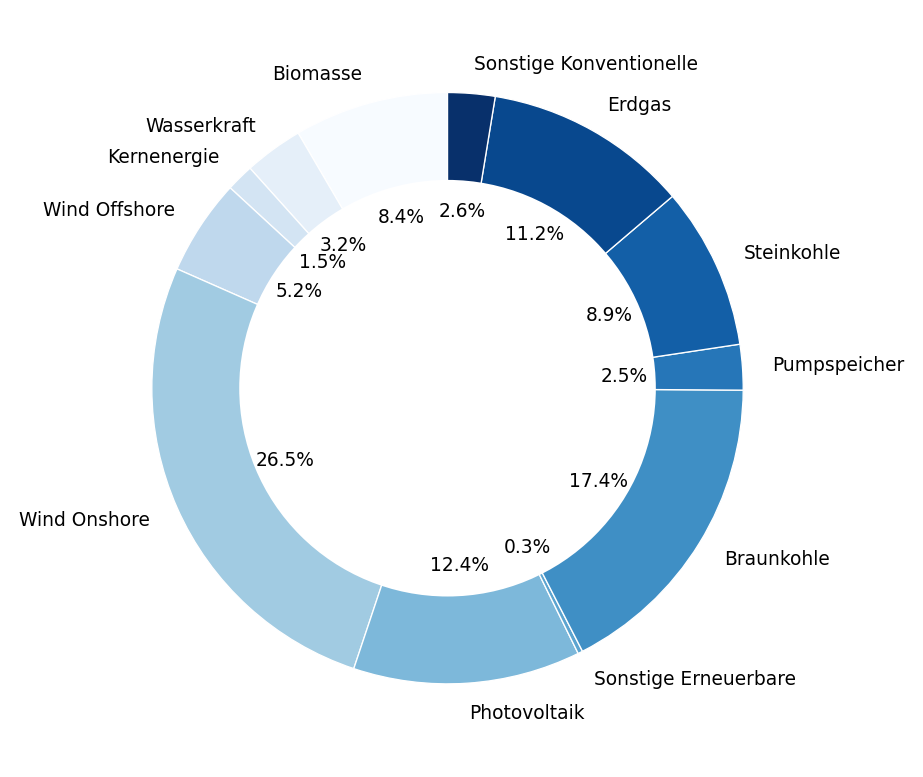

In [12]:
#| echo: false
#| fig-align: center
#| fig-cap: Anteil an der Stromerzeugung
#| fig-alt: 'In einem Ringdiagramm sind die Anteile verschiedener Erzeugungsarten an der Stromerzeugung dargestellt. Die Kreissegmente sind nicht nach Größe sortiert, sondern so angeordnet, dass sich die Beschriftung der Segmente nicht überlappt.'

# plot the pie first try - Sonstige Erneuerbare [MWh] overlaps wih Kernenergie [MWh] and Pumpsicher [MWh]
# erzeugung.sum(numeric_only = True).plot.pie(colormap = "Blues", startangle = 90, rotatelabels = True, explode = explosion)

# rearrange columns, remove " [MWh]"
plotting_data = erzeugung.copy()
column_to_move = plotting_data.pop("Kernenergie [MWh]")
plotting_data.insert(4, "Kernenergie [MWh]", column_to_move)

column_to_move = plotting_data.pop("Pumpspeicher [MWh]")
plotting_data.insert(10, "Pumpspeicher [MWh]", column_to_move)

plotting_data.columns = plotting_data.columns.str.replace(pat = " [MWh]", repl = "")

# plot the pie
ax = plotting_data.sum(numeric_only = True).plot.pie(colormap = "Blues", startangle = 90, rotatelabels = False, autopct='%1.1f%%', pctdistance = 0.6, textprops = dict(size = 7, color = 'black'), wedgeprops = {"linewidth": 0.5, "edgecolor": "white"})

# make a donut
my_axis = plt.gca() # plt.gca = get current axis
circle = plt.Circle((0, 0), radius = 0.7, color = "white")
ax.add_patch(circle)

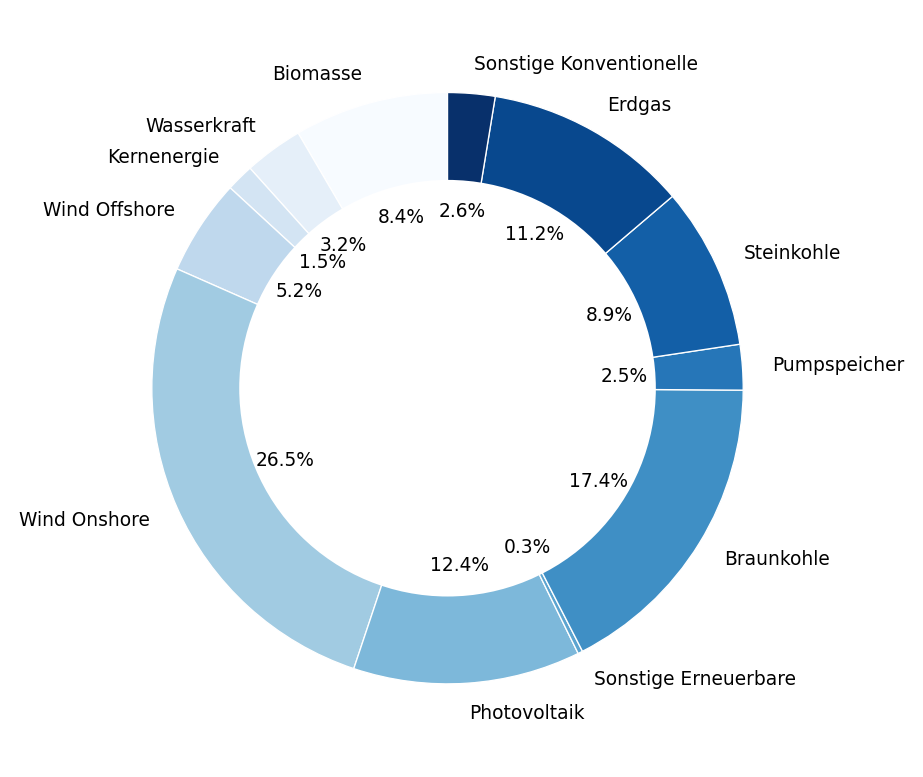

In [13]:
#| output: false

# plot the pie first try - Sonstige Erneuerbare [MWh] overlaps wih Kernenergie [MWh] and Pumpsicher [MWh]
# erzeugung.sum(numeric_only = True).plot.pie(colormap = "Blues", startangle = 90, rotatelabels = True, explode = explosion)

# rearrange columns, remove " [MWh]"
plotting_data = erzeugung.copy()
column_to_move = plotting_data.pop("Kernenergie [MWh]")
plotting_data.insert(4, "Kernenergie [MWh]", column_to_move)

column_to_move = plotting_data.pop("Pumpspeicher [MWh]")
plotting_data.insert(10, "Pumpspeicher [MWh]", column_to_move)

plotting_data.columns = plotting_data.columns.str.replace(pat = " [MWh]", repl = "")

# plot the pie
ax = plotting_data.sum(numeric_only = True).plot.pie(colormap = "Blues", startangle = 90, rotatelabels = False, autopct='%1.1f%%', pctdistance = 0.6, textprops = dict(size = 7, color = 'black'), wedgeprops = {"linewidth": 0.5, "edgecolor": "white"})

# make a donut
my_axis = plt.gca() # plt.gca = get current axis
circle = plt.Circle((0, 0), radius = 0.7, color = "white")
ax.add_patch(circle)

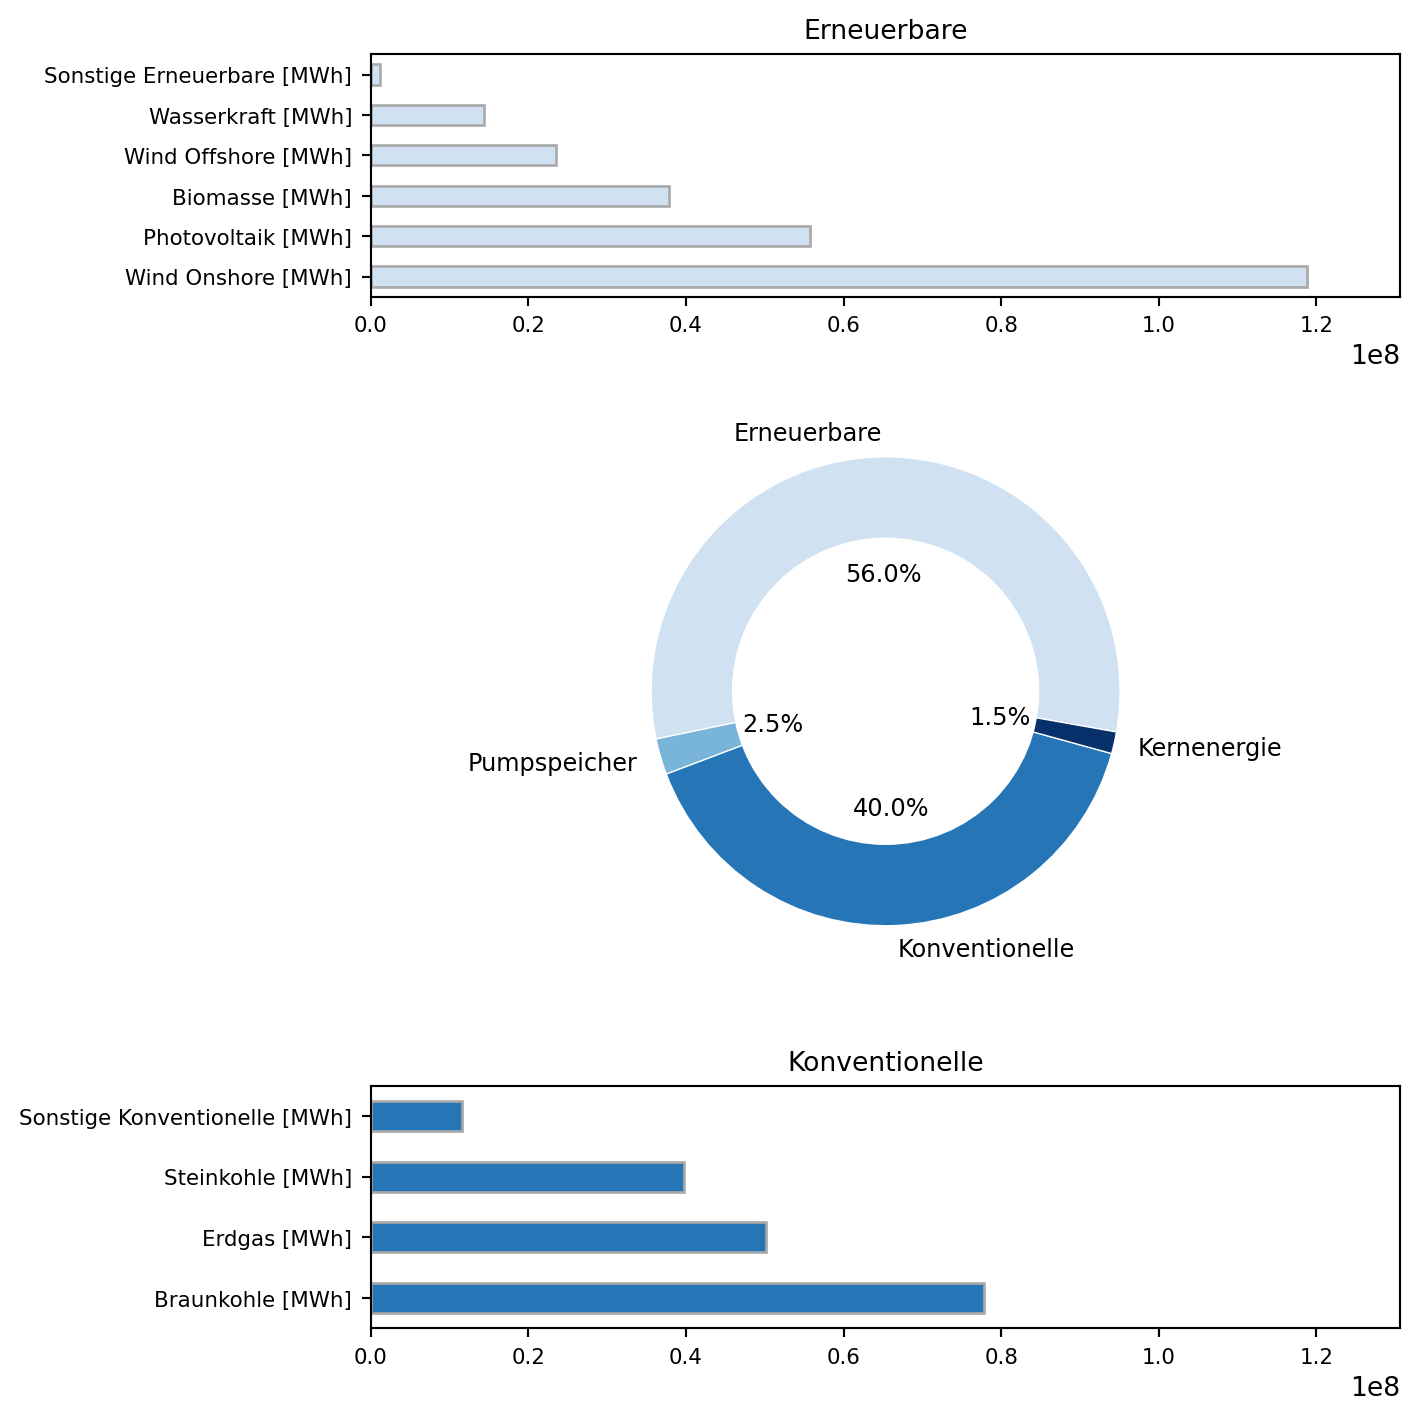

In [14]:
#| echo: false
#| fig-align: center
#| fig-cap: Absolute Stromerzeugung und relative Anteile nach Erzeugungstyp
#| fig-alt: 'Die Grafik besteht aus drei, übereinander angeordneten Teilgrafiken. In der Mitte ist ein Kreisdiagramm der Erzeugungsanteile erneuerbarer Energien (56%), konventioneller Energien (40%) sowie Pumpspeicher (2.5%) und Kernergie (1.5%) zu sehen. Die Kreissegmente sind in Blautönen eingefärbt. Oben ist in einem horizontalen Balkendiagramm die absolute Erzeugung der erneuerbaren Energien von oben nach unten aufsteigend dargestellt. Beginnend mit der geringsten Erzeugung: Sonstige Erneuerbare, Wasserkraft, Wind Offshore, Biomasse, Photovoltaik, Wind Onshore. Unten ist ein einem horizontalen Balkendiagramm die absolute Erzeugung der konventionellen Energie von oben nach unten aufsteigend dargestellt. Beginnend mit der geringsten Erzeugung: Sonstige Konventionelle, Steinkohle, Erdgas, Braunkohle.'

# Erneuerbare und Konventionelle bestimmen, jeweils summieren

## Erneuerbare
plotting_data = erzeugung.copy()
plotting_data.drop(columns = ['Datum von', 'Datum bis', 'Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]',
'Wind Onshore [MWh]', 'Photovoltaik [MWh]',
'Sonstige Erneuerbare [MWh]'], inplace = True) # Datumsspalten entfernen, inplace = False liefert eine Kopie und tut deshalb ohne Objektzuweisung 'nichts'
erneuerbare = ['Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]',
'Sonstige Erneuerbare [MWh]']
plotting_data["Erneuerbare"] = erzeugung[erneuerbare].sum(axis = 'columns')

## Konventionelle
plotting_data.drop(columns = ['Braunkohle [MWh]',  'Steinkohle [MWh]', 'Erdgas [MWh]', 'Sonstige Konventionelle [MWh]'], inplace = True)
konventionelle = ['Braunkohle [MWh]',  'Steinkohle [MWh]', 'Erdgas [MWh]', 'Sonstige Konventionelle [MWh]']
plotting_data["Konventionelle"] = erzeugung[konventionelle].sum(axis = 'columns')

# rearrange columns, remove " [MWh]"
plotting_data = plotting_data[['Erneuerbare', 'Pumpspeicher [MWh]', 'Konventionelle', 'Kernenergie [MWh]']]
plotting_data.columns = plotting_data.columns.str.replace(pat = " [MWh]", repl = "")

# zur Kontrolle - axis = columns addiert die Spalten zeilenweise
## print(erneuerbare)
## print(erzeugung[erneuerbare].sum(axis = 'columns'))
## print(plotting_data.columns)
## print(plotting_data[0:3])

# Grafik mit drei subplots erzeugen
plt.figure(figsize = (7.5, 7.5))

nrows = 4
ncols = 2
font_size = 8

# value for shared x-axis on barplots
x_lim = erzeugung.sum(numeric_only = True).max() * 1.1

# array of colors
my_colors = plt.get_cmap('Blues')(np.linspace(0.2, 1, len(plotting_data.sum())))

# plot the pie, use 4 out of 8 panels = middle 2 rows
ax = plt.subplot(nrows, ncols, (3, 6))
plt.pie(x = plotting_data.sum(), colors = my_colors, startangle = 350, labels = list(plotting_data.columns), autopct='%1.1f%%', pctdistance = 0.5, textprops = dict(size = font_size + 1), wedgeprops = {"linewidth": 0.5, "edgecolor": "white"})

# make a donut
my_axis = plt.gca() # plt.gca = get current axis
circle = plt.Circle((0, 0), radius = 0.65, color = "white")
ax.add_patch(circle)

# top row unstacked barplot 
plt.subplot(nrows, ncols, (1, 2))
erzeugung[erneuerbare].sum().sort_values(ascending = False).plot.barh(fontsize = font_size, xlim = (0, x_lim), color = my_colors[0], edgecolor = 'darkgrey')
plt.title("Erneuerbare", fontsize = font_size + 2)

# bottom row unstacked barplot 
plt.subplot(nrows, ncols, (7, 8))
erzeugung[konventionelle].sum().sort_values(ascending = False).plot.barh(fontsize = font_size, xlim = (0, x_lim), color = my_colors[2], edgecolor = 'darkgrey')
plt.title("Konventionelle", fontsize = font_size + 2)

plt.tight_layout()
plt.show()

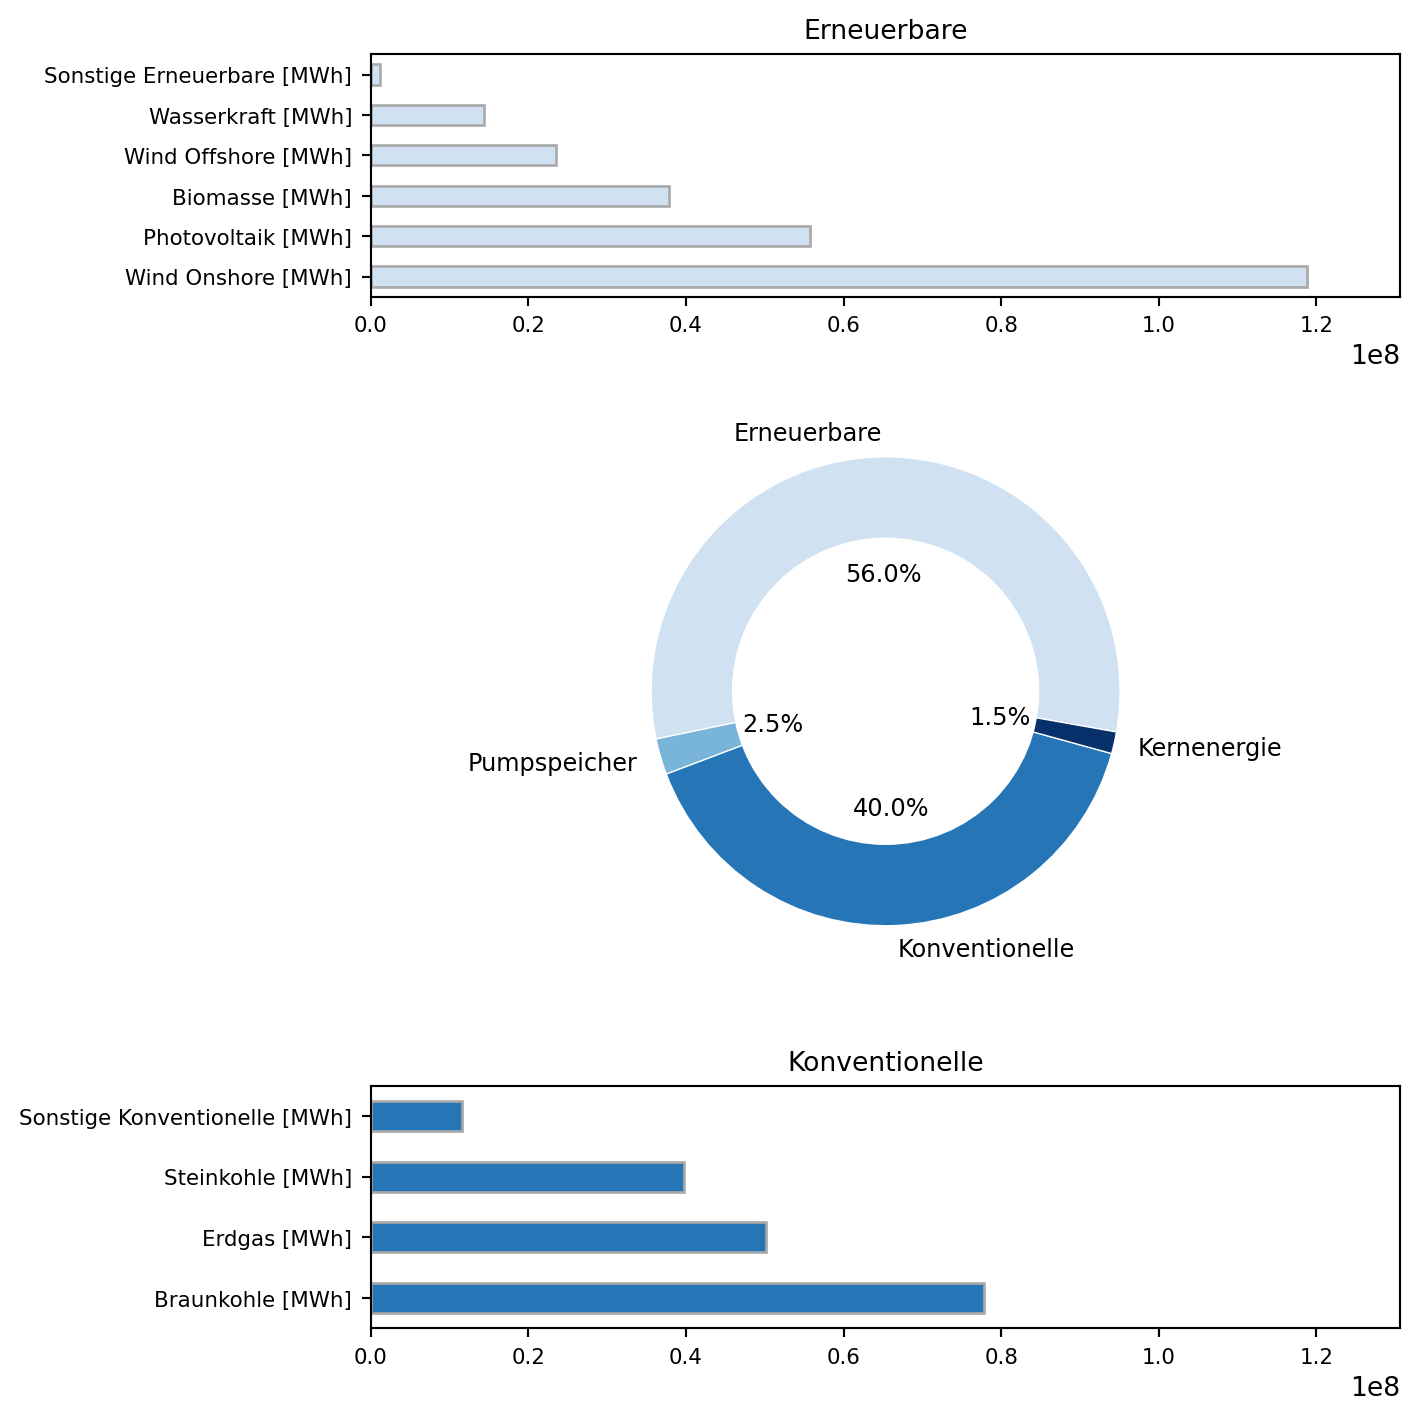

In [15]:
#| output: false

# Erneuerbare und Konventionelle bestimmen, jeweils summieren

## Erneuerbare
plotting_data = erzeugung.copy()
plotting_data.drop(columns = ['Datum von', 'Datum bis', 'Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]',
'Wind Onshore [MWh]', 'Photovoltaik [MWh]',
'Sonstige Erneuerbare [MWh]'], inplace = True) # Datumsspalten entfernen, inplace = False liefert eine Kopie und tut deshalb ohne Objektzuweisung 'nichts'
erneuerbare = ['Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]',
'Sonstige Erneuerbare [MWh]']
plotting_data["Erneuerbare"] = erzeugung[erneuerbare].sum(axis = 'columns')

## Konventionelle
plotting_data.drop(columns = ['Braunkohle [MWh]',  'Steinkohle [MWh]', 'Erdgas [MWh]', 'Sonstige Konventionelle [MWh]'], inplace = True)
konventionelle = ['Braunkohle [MWh]',  'Steinkohle [MWh]', 'Erdgas [MWh]', 'Sonstige Konventionelle [MWh]']
plotting_data["Konventionelle"] = erzeugung[konventionelle].sum(axis = 'columns')

# rearrange columns, remove " [MWh]"
plotting_data = plotting_data[['Erneuerbare', 'Pumpspeicher [MWh]', 'Konventionelle', 'Kernenergie [MWh]']]
plotting_data.columns = plotting_data.columns.str.replace(pat = " [MWh]", repl = "")

# zur Kontrolle - axis = columns addiert die Spalten zeilenweise
## print(erneuerbare)
## print(erzeugung[erneuerbare].sum(axis = 'columns'))
## print(plotting_data.columns)
## print(plotting_data[0:3])

# Grafik mit drei subplots erzeugen
plt.figure(figsize = (7.5, 7.5))

nrows = 4
ncols = 2
font_size = 8

# value for shared x-axis on barplots
x_lim = erzeugung.sum(numeric_only = True).max() * 1.1

# array of colors
my_colors = plt.get_cmap('Blues')(np.linspace(0.2, 1, len(plotting_data.sum())))

# plot the pie, use 4 out of 8 panels = middle 2 rows
ax = plt.subplot(nrows, ncols, (3, 6))
plt.pie(x = plotting_data.sum(), colors = my_colors, startangle = 350, labels = list(plotting_data.columns), autopct='%1.1f%%', pctdistance = 0.5, textprops = dict(size = font_size + 1), wedgeprops = {"linewidth": 0.5, "edgecolor": "white"})

# make a donut
my_axis = plt.gca() # plt.gca = get current axis
circle = plt.Circle((0, 0), radius = 0.65, color = "white")
ax.add_patch(circle)

# top row unstacked barplot 
plt.subplot(nrows, ncols, (1, 2))
erzeugung[erneuerbare].sum().sort_values(ascending = False).plot.barh(fontsize = font_size, xlim = (0, x_lim), color = my_colors[0], edgecolor = 'darkgrey')
plt.title("Erneuerbare", fontsize = font_size + 2)

# bottom row unstacked barplot 
plt.subplot(nrows, ncols, (7, 8))
erzeugung[konventionelle].sum().sort_values(ascending = False).plot.barh(fontsize = font_size, xlim = (0, x_lim), color = my_colors[2], edgecolor = 'darkgrey')
plt.title("Konventionelle", fontsize = font_size + 2)

plt.tight_layout()
plt.show()

In [16]:
#| output: true

print(f"Summe Erzeugung Pumpspeicher: {erzeugung["Pumpspeicher [MWh]"].sum():.2f}\n"
      f"Summe Verbrauch Pumpspeicher: {verbrauch["Pumpspeicher [MWh]"].sum():.2f}\n"
      f"{41 * "="}\n"
      f"Wirkungsgrad in Prozent: \t\t\t{( erzeugung["Pumpspeicher [MWh]"].sum() / verbrauch["Pumpspeicher [MWh]"].sum() ) * 100:.2f}")

Summe Erzeugung Pumpspeicher: 11149398.50
Summe Verbrauch Pumpspeicher: 14095632.75
Wirkungsgrad in Prozent: 			79.10


In [17]:
#| output: true

print(f"Speicherverluste:\t\t\t{ (speicherverluste := ( verbrauch["Pumpspeicher [MWh]"].sum() - erzeugung["Pumpspeicher [MWh]"].sum() ) / (1000 * 1000) ):>6.2f} TWh\n"
      f"kumulierte Stromerzeugung:\t{ ( kumulierte_erzeugung := erzeugung.sum(numeric_only = True).sum() // (1000 * 1000) ):.2f} TWh\n"
      f"Summe:\t\t\t\t\t\t{speicherverluste + kumulierte_erzeugung:.2f} TWh\n\n"

      f"Erzeugung durch Pumpspeicher:\t\t\t\t{erzeugung["Pumpspeicher [MWh]"].sum() / (1000 * 1000):.2f} TWh\n"
      f"Erzeugung Pumpspeicher + Speicherverluste:\t{(erzeugung["Pumpspeicher [MWh]"].sum() / (1000 * 1000)) + speicherverluste:.2f} TWh\n"
      f"Verbrauch Pumpspeicherkraftwerke:\t\t\t{verbrauch["Pumpspeicher [MWh]"].sum() / (1000 * 1000):.2f} TWh")


Speicherverluste:			  2.95 TWh
kumulierte Stromerzeugung:	448.00 TWh
Summe:						450.95 TWh

Erzeugung durch Pumpspeicher:				11.15 TWh
Erzeugung Pumpspeicher + Speicherverluste:	14.10 TWh
Verbrauch Pumpspeicherkraftwerke:			14.10 TWh


In [18]:
print(verbrauch.sum(numeric_only = True))

Gesamt (Netzlast) [MWh]    4.58e+08
Residuallast [MWh]         2.60e+08
Pumpspeicher [MWh]         1.41e+07
dtype: float64


In [19]:
erneuerbare = ['Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Sonstige Erneuerbare [MWh]']
PV_WindOnshore_WindOffshore = ['Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]'] 

plotting_data = pd.DataFrame()
plotting_data["Netzlast [MWh]"] = verbrauch["Gesamt (Netzlast) [MWh]"].copy() 
plotting_data["volatile EE [MWh]"] = erzeugung[PV_WindOnshore_WindOffshore].sum(axis = "columns").copy()
plotting_data["Erneuerbare [MWh]"] = erzeugung[erneuerbare].sum(axis = "columns").copy()

plotting_data["Residuallast BNetzA [MWh]"] = verbrauch["Residuallast [MWh]"].copy()
plotting_data["Residuallast [MWh]"] = plotting_data["Netzlast [MWh]"] - plotting_data["volatile EE [MWh]"]
plotting_data["Restlast [MWh]"] = plotting_data["Netzlast [MWh]"] - plotting_data["Erneuerbare [MWh]"]

plotting_data.head()

Netzlast [MWh]  volatile EE [MWh]  Erneuerbare [MWh]  \
0         9720.75            7830.50            9277.00   
1         9641.25            7902.00            9343.00   
2         9609.50            8119.50            9559.50   
3         9565.00            7919.00            9362.25   
4         9473.50            8107.75            9540.50   

   Residuallast BNetzA [MWh]  Residuallast [MWh]  Restlast [MWh]  
0                    1890.25             1890.25          443.75  
1                    1739.25             1739.25          298.25  
2                    1490.00             1490.00           50.00  
3                    1646.00             1646.00          202.75  
4                    1365.75             1365.75          -67.00

In [20]:
#| include: true

plotting_data['Residuallast BNetzA [MWh]'].equals(plotting_data['Residuallast [MWh]'])

True

In [21]:
#| include: true

plotting_data.drop(['Residuallast BNetzA [MWh]'], axis = 'columns', inplace = True)

In [22]:
#| include: false

## mit Pandas
monate_index = erzeugung[~erzeugung["Datum von"].dt.month.duplicated()].index
monatsnamen = erzeugung["Datum von"].iloc[monate_index].dt.strftime("%B") 

## alternativ mit einer Listenoperation

### Position und Inhalt der x-Achsenbeschriftung finden
# monate = erzeugung["Datum von"].dt.month.unique().tolist() # gibt die Zahlen 1-12 aus

# monate_index = []
# monatsnamen = []

# for i in monate:
#   monate_index.append(erzeugung.index[erzeugung["Datum von"].dt.month == i].min())
#   monatsnamen.append(erzeugung["Datum von"].iloc[monate_index[i - 1]].strftime("%B"))

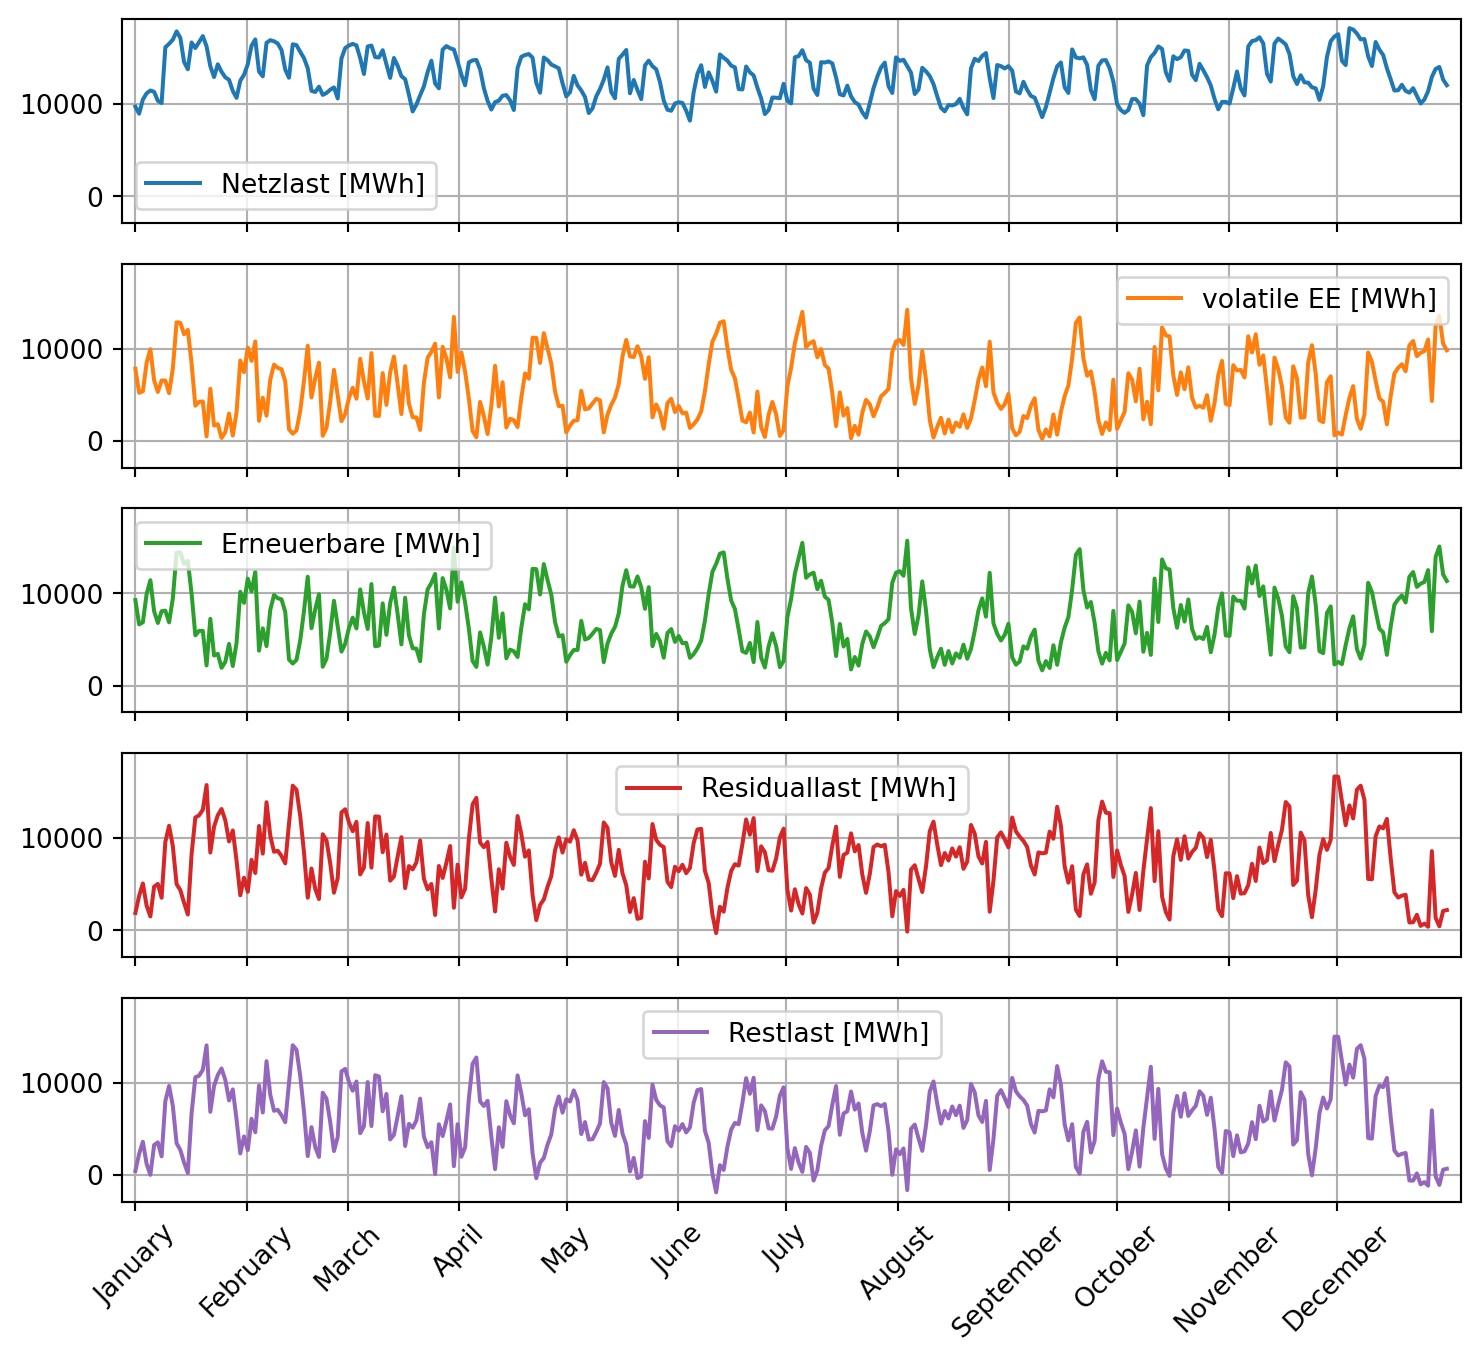

In [23]:
#| echo: false
#| fig-align: center
#| fig-cap: Netzlast im Jahresgang
#| fig-alt: 'Gemeinsame Darstellung in fünf übereinander angeordneten Teilgrafiken 1. der Netzlast, 2. der kumulierten Erzeugung durch Photovoltaik, Wind Onshore und Wind Offshore, 3. der kumulierten Erzeugung durch erneuerbare Energien, 4. der Residuallast und der 5. Restlast im Jahresverlauf.'

# plotten jedes 100. Werts
plotting_data[::100].plot(figsize = (9, 8), subplots = True, sharey = True, xlim = (plotting_data.index.min() - (len(plotting_data.index)) / 100, plotting_data.index.max() * 1.01), rot = 45, grid = True)
plt.minorticks_off()
plt.xticks(monate_index, monatsnamen);

In [24]:
#| output: true

# Position und Inhalt der x-Achsenbeschriftung finden
monate = erzeugung["Datum von"].dt.month.unique().tolist() # gibt die Zahlen 1-12 aus

## mit Pandas
monate_index = erzeugung[~erzeugung["Datum von"].dt.month.duplicated()].index
monatsnamen = erzeugung["Datum von"].iloc[monate_index].dt.strftime("%B") 

## alternativ mit einer Listenoperation
# monate_index = []
# monatsnamen = []

# for i in monate:
#   monate_index.append(erzeugung.index[erzeugung["Datum von"].dt.month == i].min())
#   monatsnamen.append(erzeugung["Datum von"].iloc[monate_index[i - 1]].strftime("%B"))

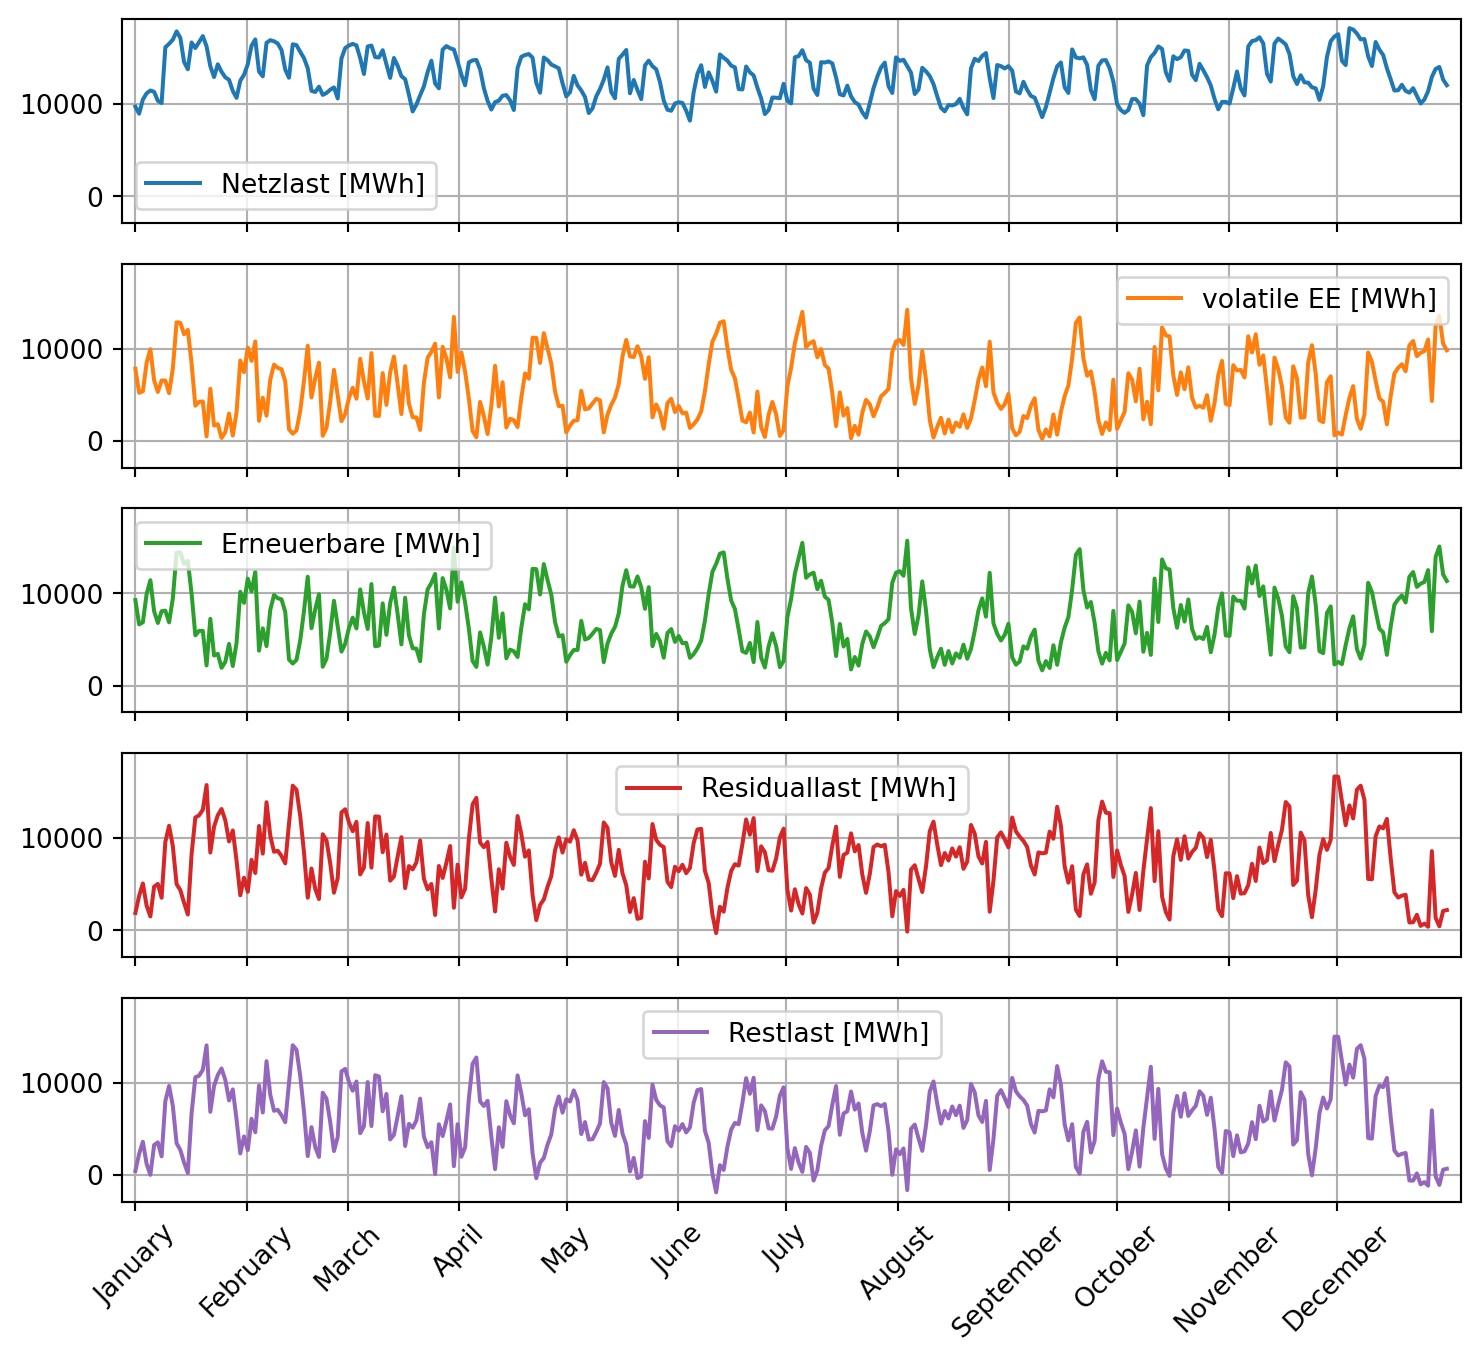

In [25]:
#| output: false

# plotten jedes 100. Werts
plotting_data[::100].plot(figsize = (9, 8), subplots = True, sharey = True, xlim = (plotting_data.index.min() - (len(plotting_data.index)) / 100, plotting_data.index.max() * 1.01), rot = 45, grid = True)
plt.minorticks_off()
plt.xticks(monate_index, monatsnamen);

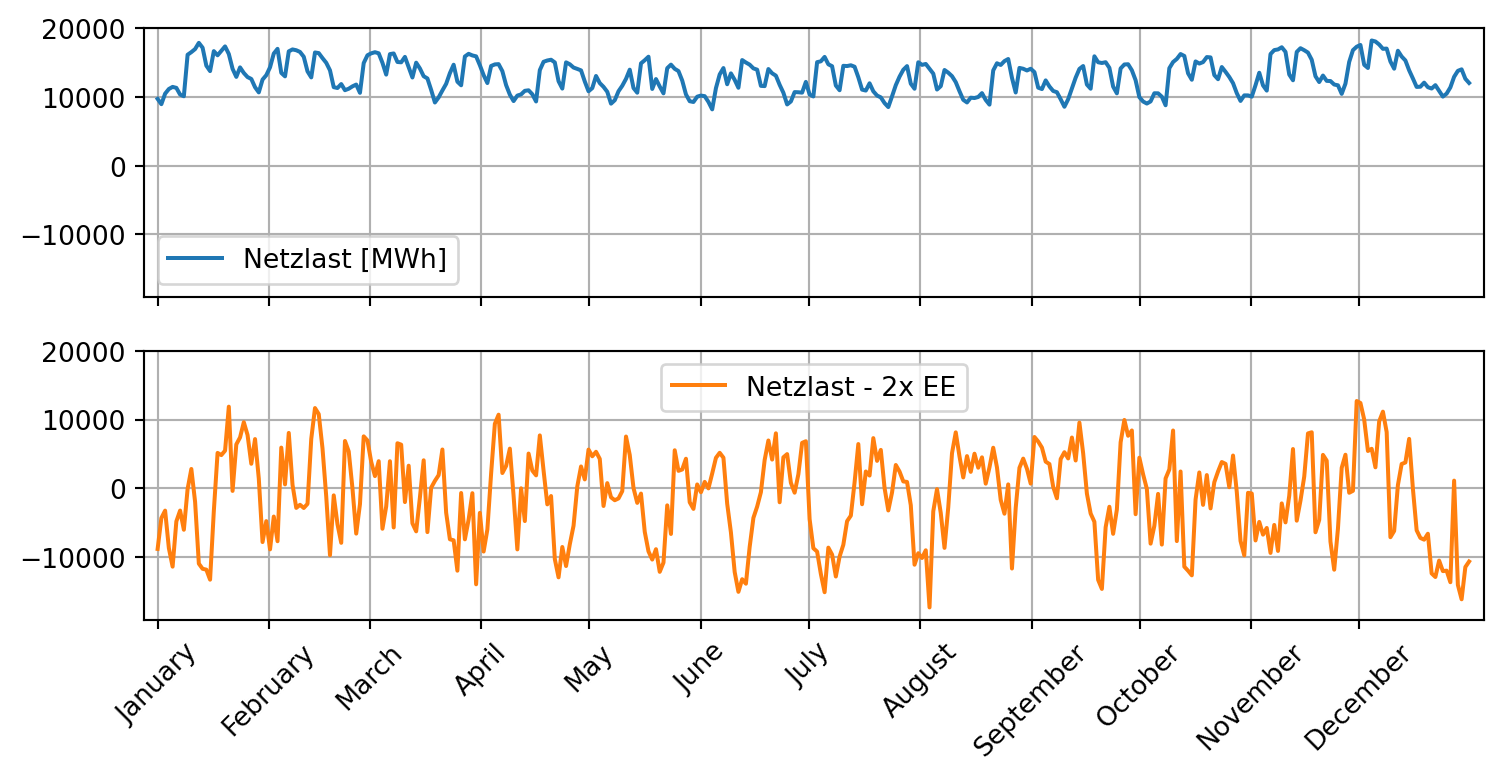

In [26]:
#| echo: false
#| fig-cap: Musterlösung Verdopplung EE
#| fig-alt: "Darstellung der Netzlast und der Netzlast abzüglich der verdoppelten kumulierten Stromerzeugung erneuerbarer Energien im Jahresgang. Die Netzlast abzüglich der verdoppelten erneuerbaren Stromerzeugung nähert sich einer symmetrischen Verteilung um die Nullinie an. Das heißt, Phasen erneuerbarer Über- und Unterproduktion halten sich ungefähr die Waage."
plotting_data_2EE = plotting_data.copy()
plotting_data_2EE["2x EE"] = plotting_data_2EE["Erneuerbare [MWh]"] * 2
plotting_data_2EE["Netzlast - 2x EE"] = plotting_data_2EE["Netzlast [MWh]"] - plotting_data_2EE["2x EE"]
plotting_data_2EE = plotting_data_2EE[["Netzlast [MWh]", "Netzlast - 2x EE"]]

# plotten jedes 100. Werts
plotting_data_2EE[::100].plot(figsize = (9, 4), subplots = True, sharey = True, xlim = (plotting_data_2EE.index.min() - (len(plotting_data_2EE.index)) / 100, plotting_data_2EE.index.max() * 1.01), rot = 45, grid = True)
plt.minorticks_off()
plt.xticks(monate_index, monatsnamen);

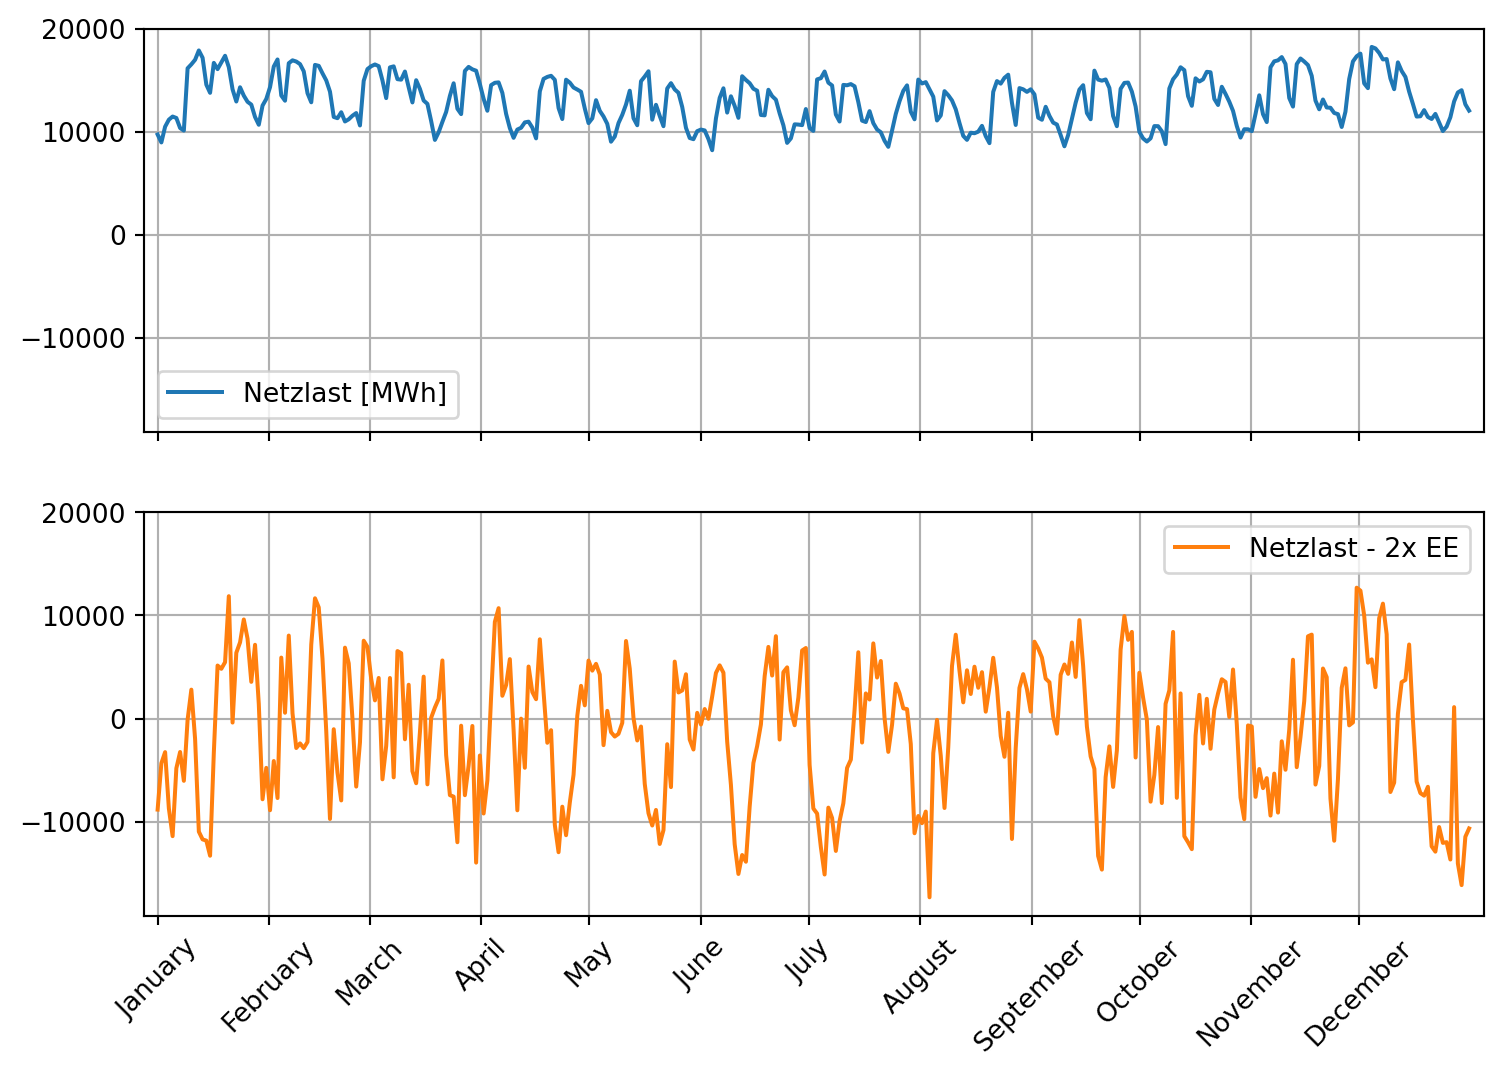

In [27]:
#| output: false
plotting_data_2EE = plotting_data.copy()
plotting_data_2EE["2x EE"] = plotting_data_2EE["Erneuerbare [MWh]"] * 2
plotting_data_2EE["Netzlast - 2x EE"] = plotting_data_2EE["Netzlast [MWh]"] - plotting_data_2EE["2x EE"]
plotting_data_2EE = plotting_data_2EE[["Netzlast [MWh]", "Netzlast - 2x EE"]]

# plotten jedes 100. Werts
plotting_data_2EE[::100].plot(figsize = (9, 6), subplots = True, sharey = True, xlim = (plotting_data_2EE.index.min() - (len(plotting_data_2EE.index)) / 100, plotting_data_2EE.index.max() * 1.01), rot = 45, grid = True)
plt.minorticks_off()
plt.xticks(monate_index, monatsnamen);

In [28]:
# print(f"{erzeugung.sum(numeric_only = True)}\n")
# print(installierte_leistung.sum(numeric_only = True), "\n")

# Für die Division müssen die Indizes zurücksetzt werden
jahresvolllaststunden = erzeugung.sum(numeric_only = True).reset_index(drop = True).divide(installierte_leistung.sum(numeric_only = True).reset_index(drop = True))

# Index neu setzen
jahresvolllaststunden.index = erzeugung.sum(numeric_only = True).index.str.replace(pat = " [MWh]", repl = " [h]")

print(f"\n\nJahresvolllaststunden\n\n{jahresvolllaststunden.sort_values(ascending = False)}")



Jahresvolllaststunden

Biomasse [h]                   4467.41
Braunkohle [h]                 4399.96
Wind Offshore [h]              2893.34
Wasserkraft [h]                2855.83
Sonstige Erneuerbare [h]       2653.47
Steinkohle [h]                 2192.86
Wind Onshore [h]               2062.55
Kernenergie [h]                1661.92
Erdgas [h]                     1576.42
Sonstige Konventionelle [h]    1293.98
Pumpspeicher [h]               1188.76
Photovoltaik [h]                883.48
dtype: float64


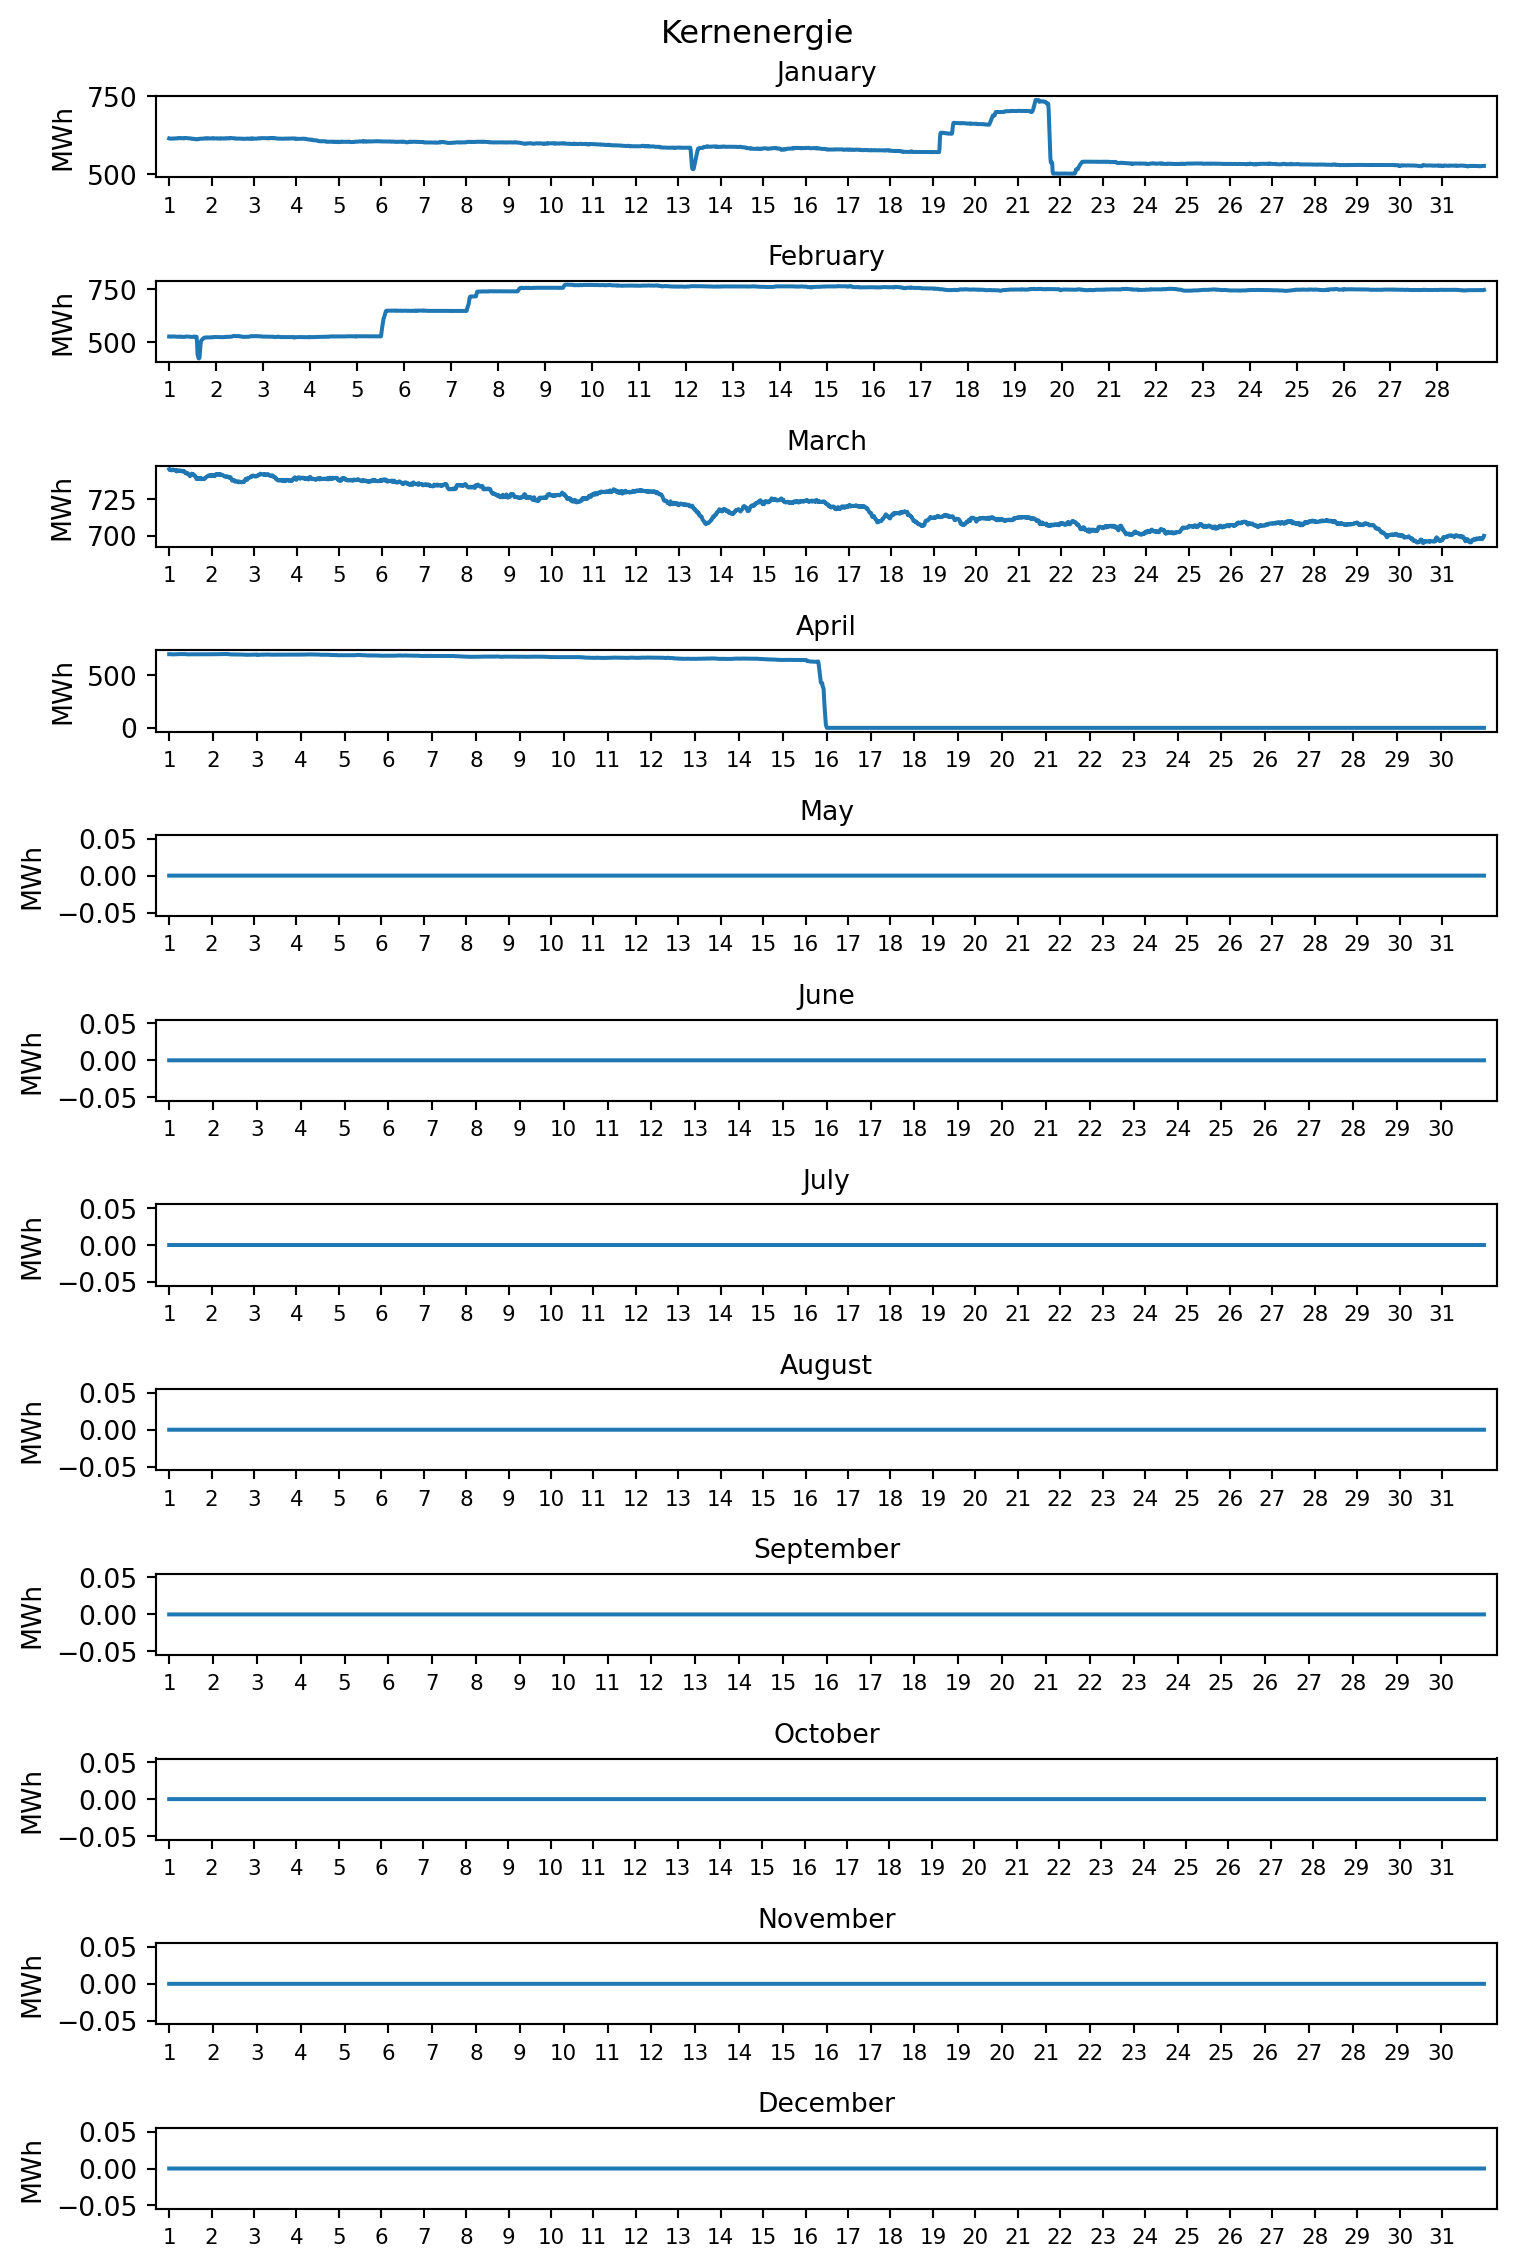

In [29]:
#| output: false
#| fig-cap: Jahresgang Kernenergie
#| fig-alt: "Für jeden Monat stellen 12 Teilgrafiken die Stromerzeugung durch Kernenergie dar. Während die Produktion von Januar bis März in einem engen Band bleibt, sinkt diese am 15. April auf Null."
plotting_data = erzeugung.copy()

erzeuger = "Kernenergie"

fig = plt.figure(figsize = (8, 12))
fig.suptitle(erzeuger, fontsize = 12)
for i in range(1, 13):
  plotting_data_monthly = plotting_data[plotting_data['Datum von'].dt.month == i]
  ax = fig.add_subplot(12, 1, i)
  ax.plot(plotting_data_monthly[erzeuger + " [MWh]"])
  plt.margins(x=0.01)
  ax.set_ylabel(ylabel= "MWh")
 
  # Titel erzeugen
  plt.title(label = plotting_data_monthly['Datum von'].head(1).dt.strftime('%B').item(), fontsize = 10)
  
  # xticks erzeugen
  tage_index = plotting_data_monthly[~plotting_data_monthly["Datum von"].dt.day.duplicated()].index
  tagesnamen = plotting_data_monthly["Datum von"].dt.day.unique() 
  plt.xticks(tage_index, tagesnamen, fontsize = 8)

plt.tight_layout()

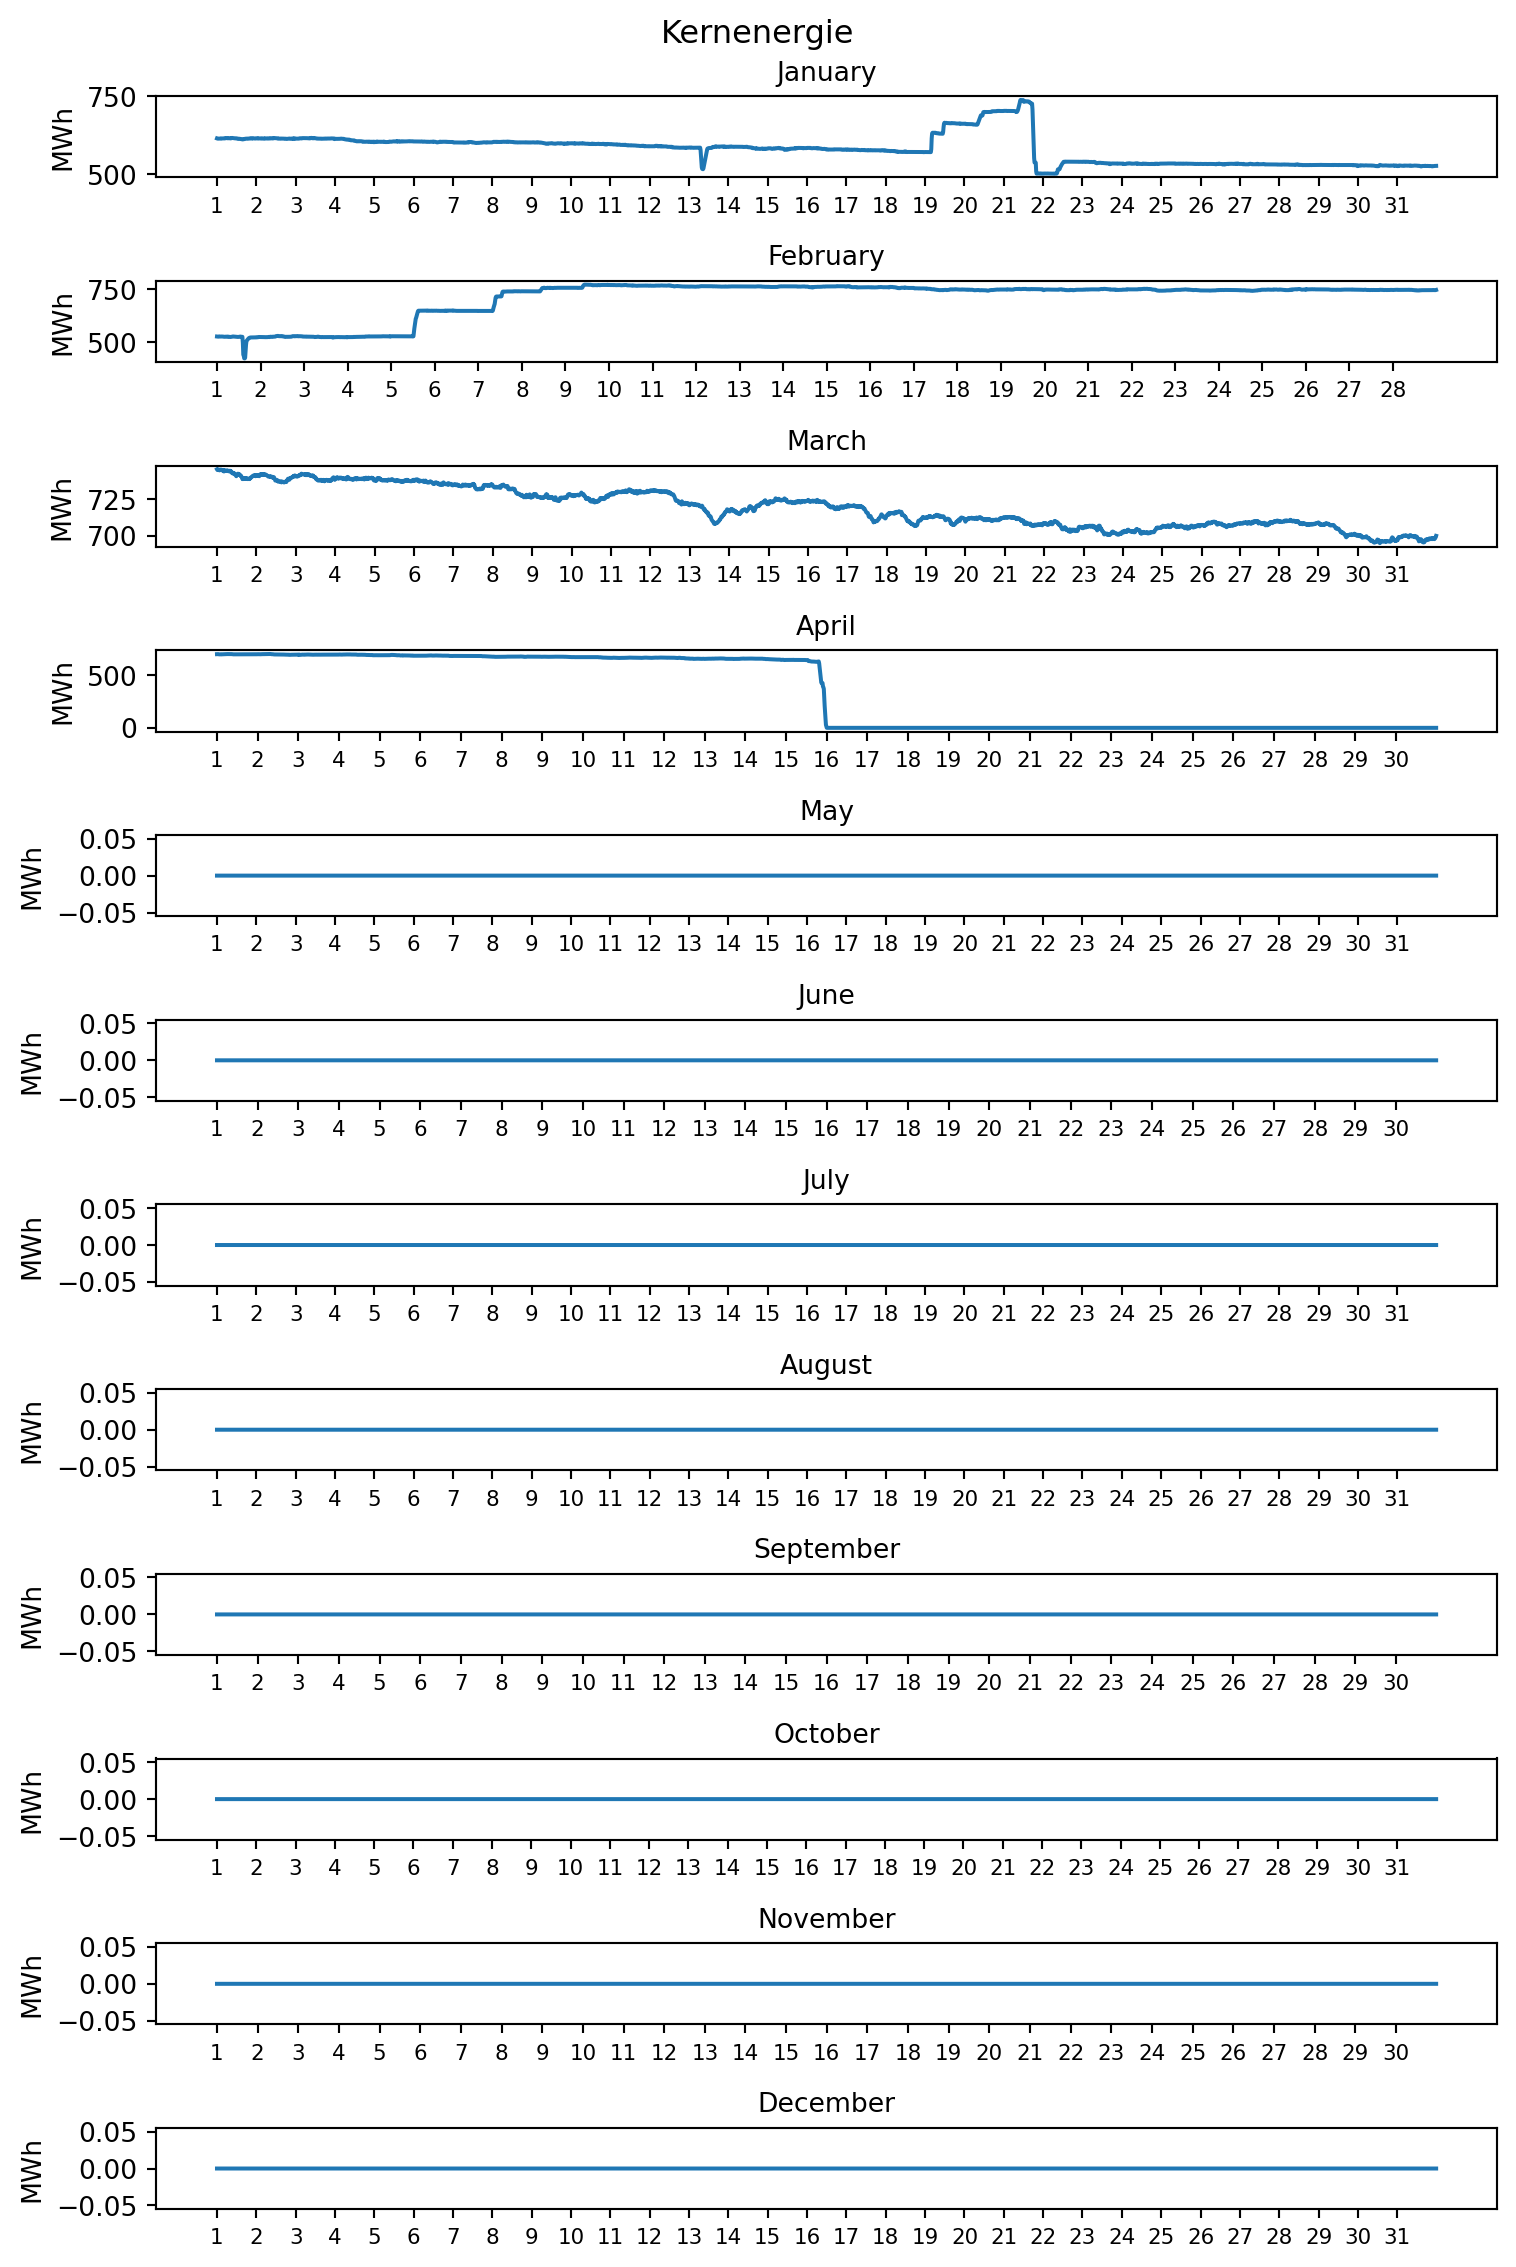

In [30]:
#| echo: false
#| fig-cap: Jahresgang Kernenergie
#| fig-alt: "Für jeden Monat stellen 12 Teilgrafiken die Stromerzeugung durch Kernenergie dar. Während die Produktion von Januar bis März in einem engen Band bleibt, sinkt diese am 15. April auf Null."
plotting_data = erzeugung.copy()

erzeuger = "Kernenergie"

fig = plt.figure(figsize = (8, 12))
fig.suptitle(erzeuger, fontsize = 12)
for i in range(1, 13):
  plotting_data_monthly = plotting_data[plotting_data['Datum von'].dt.month == i]
  ax = fig.add_subplot(12, 1, i)
  ax.plot(plotting_data_monthly[erzeuger + " [MWh]"])
  ax.set_ylabel(ylabel= "MWh")
 
  # Titel erzeugen
  plt.title(label = plotting_data_monthly['Datum von'].head(1).dt.strftime('%B').item(), fontsize = 10)
  
  # xticks erzeugen
  tage_index = plotting_data_monthly[~plotting_data_monthly["Datum von"].dt.day.duplicated()].index
  tagesnamen = plotting_data_monthly["Datum von"].dt.day.unique() 
  plt.xticks(tage_index, tagesnamen, fontsize = 8)

plt.tight_layout()

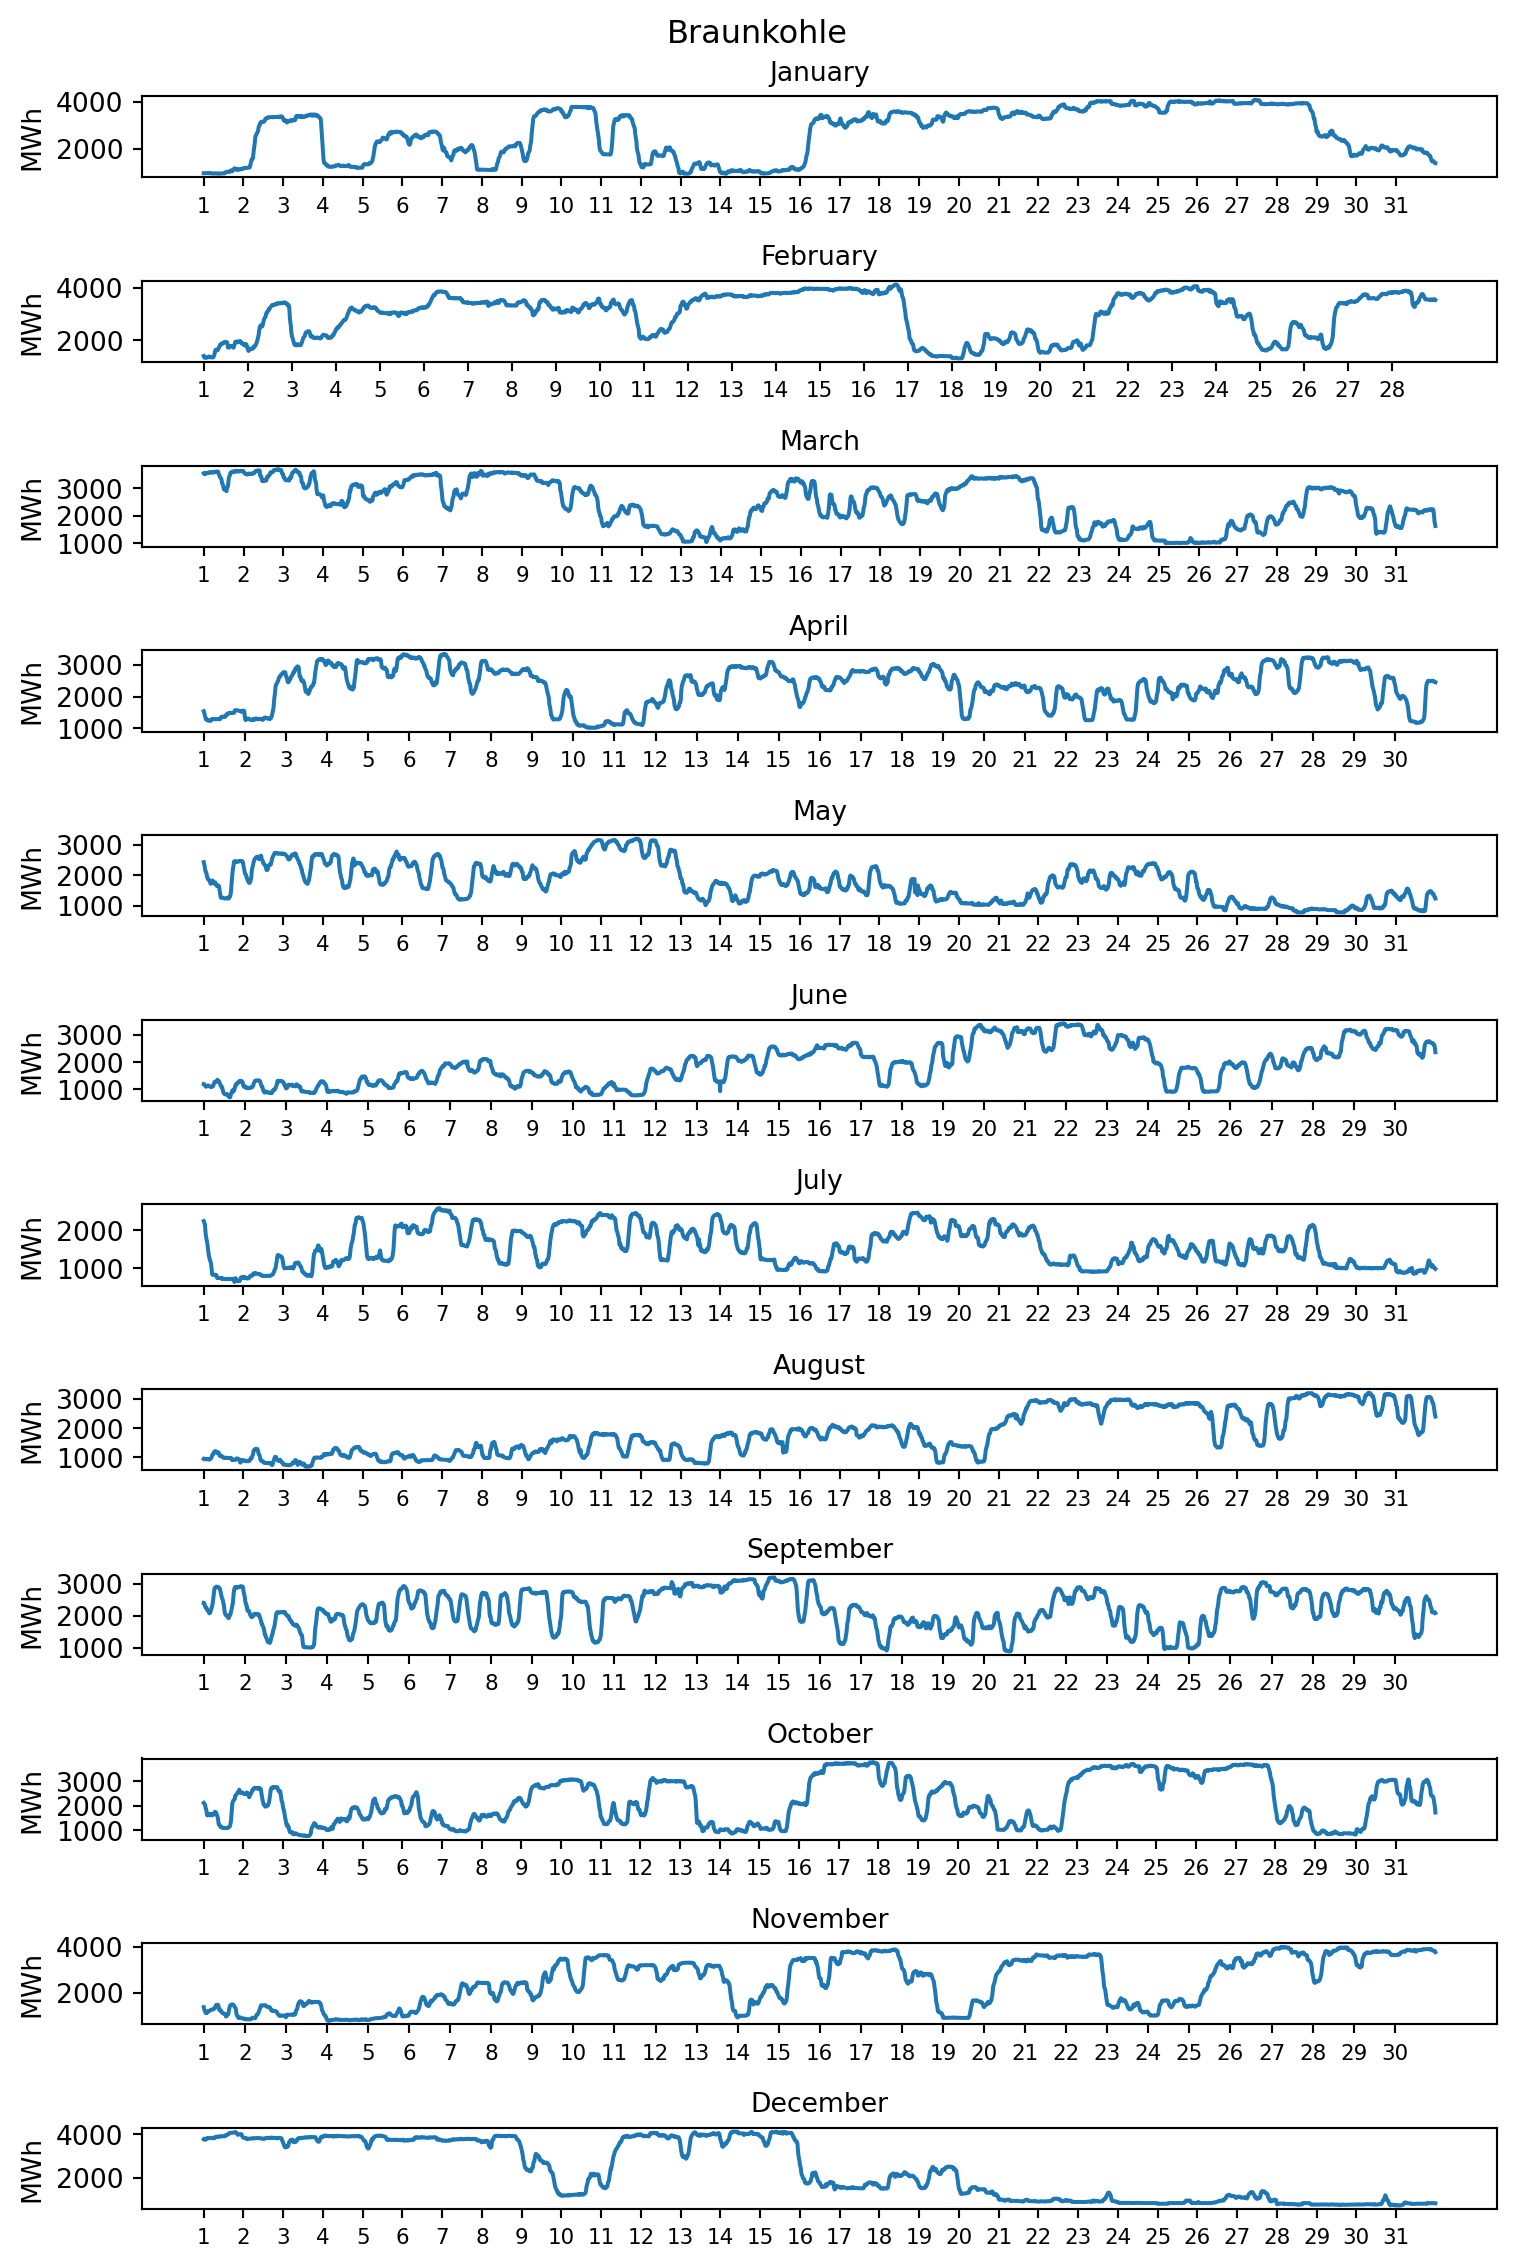

In [31]:
#| echo: false
#| fig-cap: Jahresgang Braunkohle
#| fig-alt: "Der Jahresgang der Stromerzeugung durch Braunkohle wird monatsweise in 12 Grafiken gezeigt. Der Jahresgang ist durch starke Bewegungen gekennzeichnet. Phasen der Volllastproduktion im Bereich von 4000 MWh je Viertelstunde werden nur selten über Perioden von einer Woche gefahren. Häufig werden die Produktionsspitzen nur stundenweise erreicht, um anschließend die Produktion teils stark zu drosseln. Geringe Produktionsniveaus im Bereich von 1000 MWh je Viertelstunde sind keine Seltenheit."
plotting_data = erzeugung.copy()

erzeuger = "Braunkohle"

fig = plt.figure(figsize = (8, 12))
fig.suptitle(erzeuger, fontsize = 12)
for i in range(1, 13):
  plotting_data_monthly = plotting_data[plotting_data['Datum von'].dt.month == i]
  ax = fig.add_subplot(12, 1, i)
  ax.plot(plotting_data_monthly[erzeuger + " [MWh]"])
  ax.set_ylabel(ylabel= "MWh")
 
  # Titel erzeugen
  plt.title(label = plotting_data_monthly['Datum von'].head(1).dt.strftime('%B').item(), fontsize = 10)
  
  # xticks erzeugen
  tage_index = plotting_data_monthly[~plotting_data_monthly["Datum von"].dt.day.duplicated()].index
  tagesnamen = plotting_data_monthly["Datum von"].dt.day.unique() 
  plt.xticks(tage_index, tagesnamen, fontsize = 8)

plt.tight_layout()

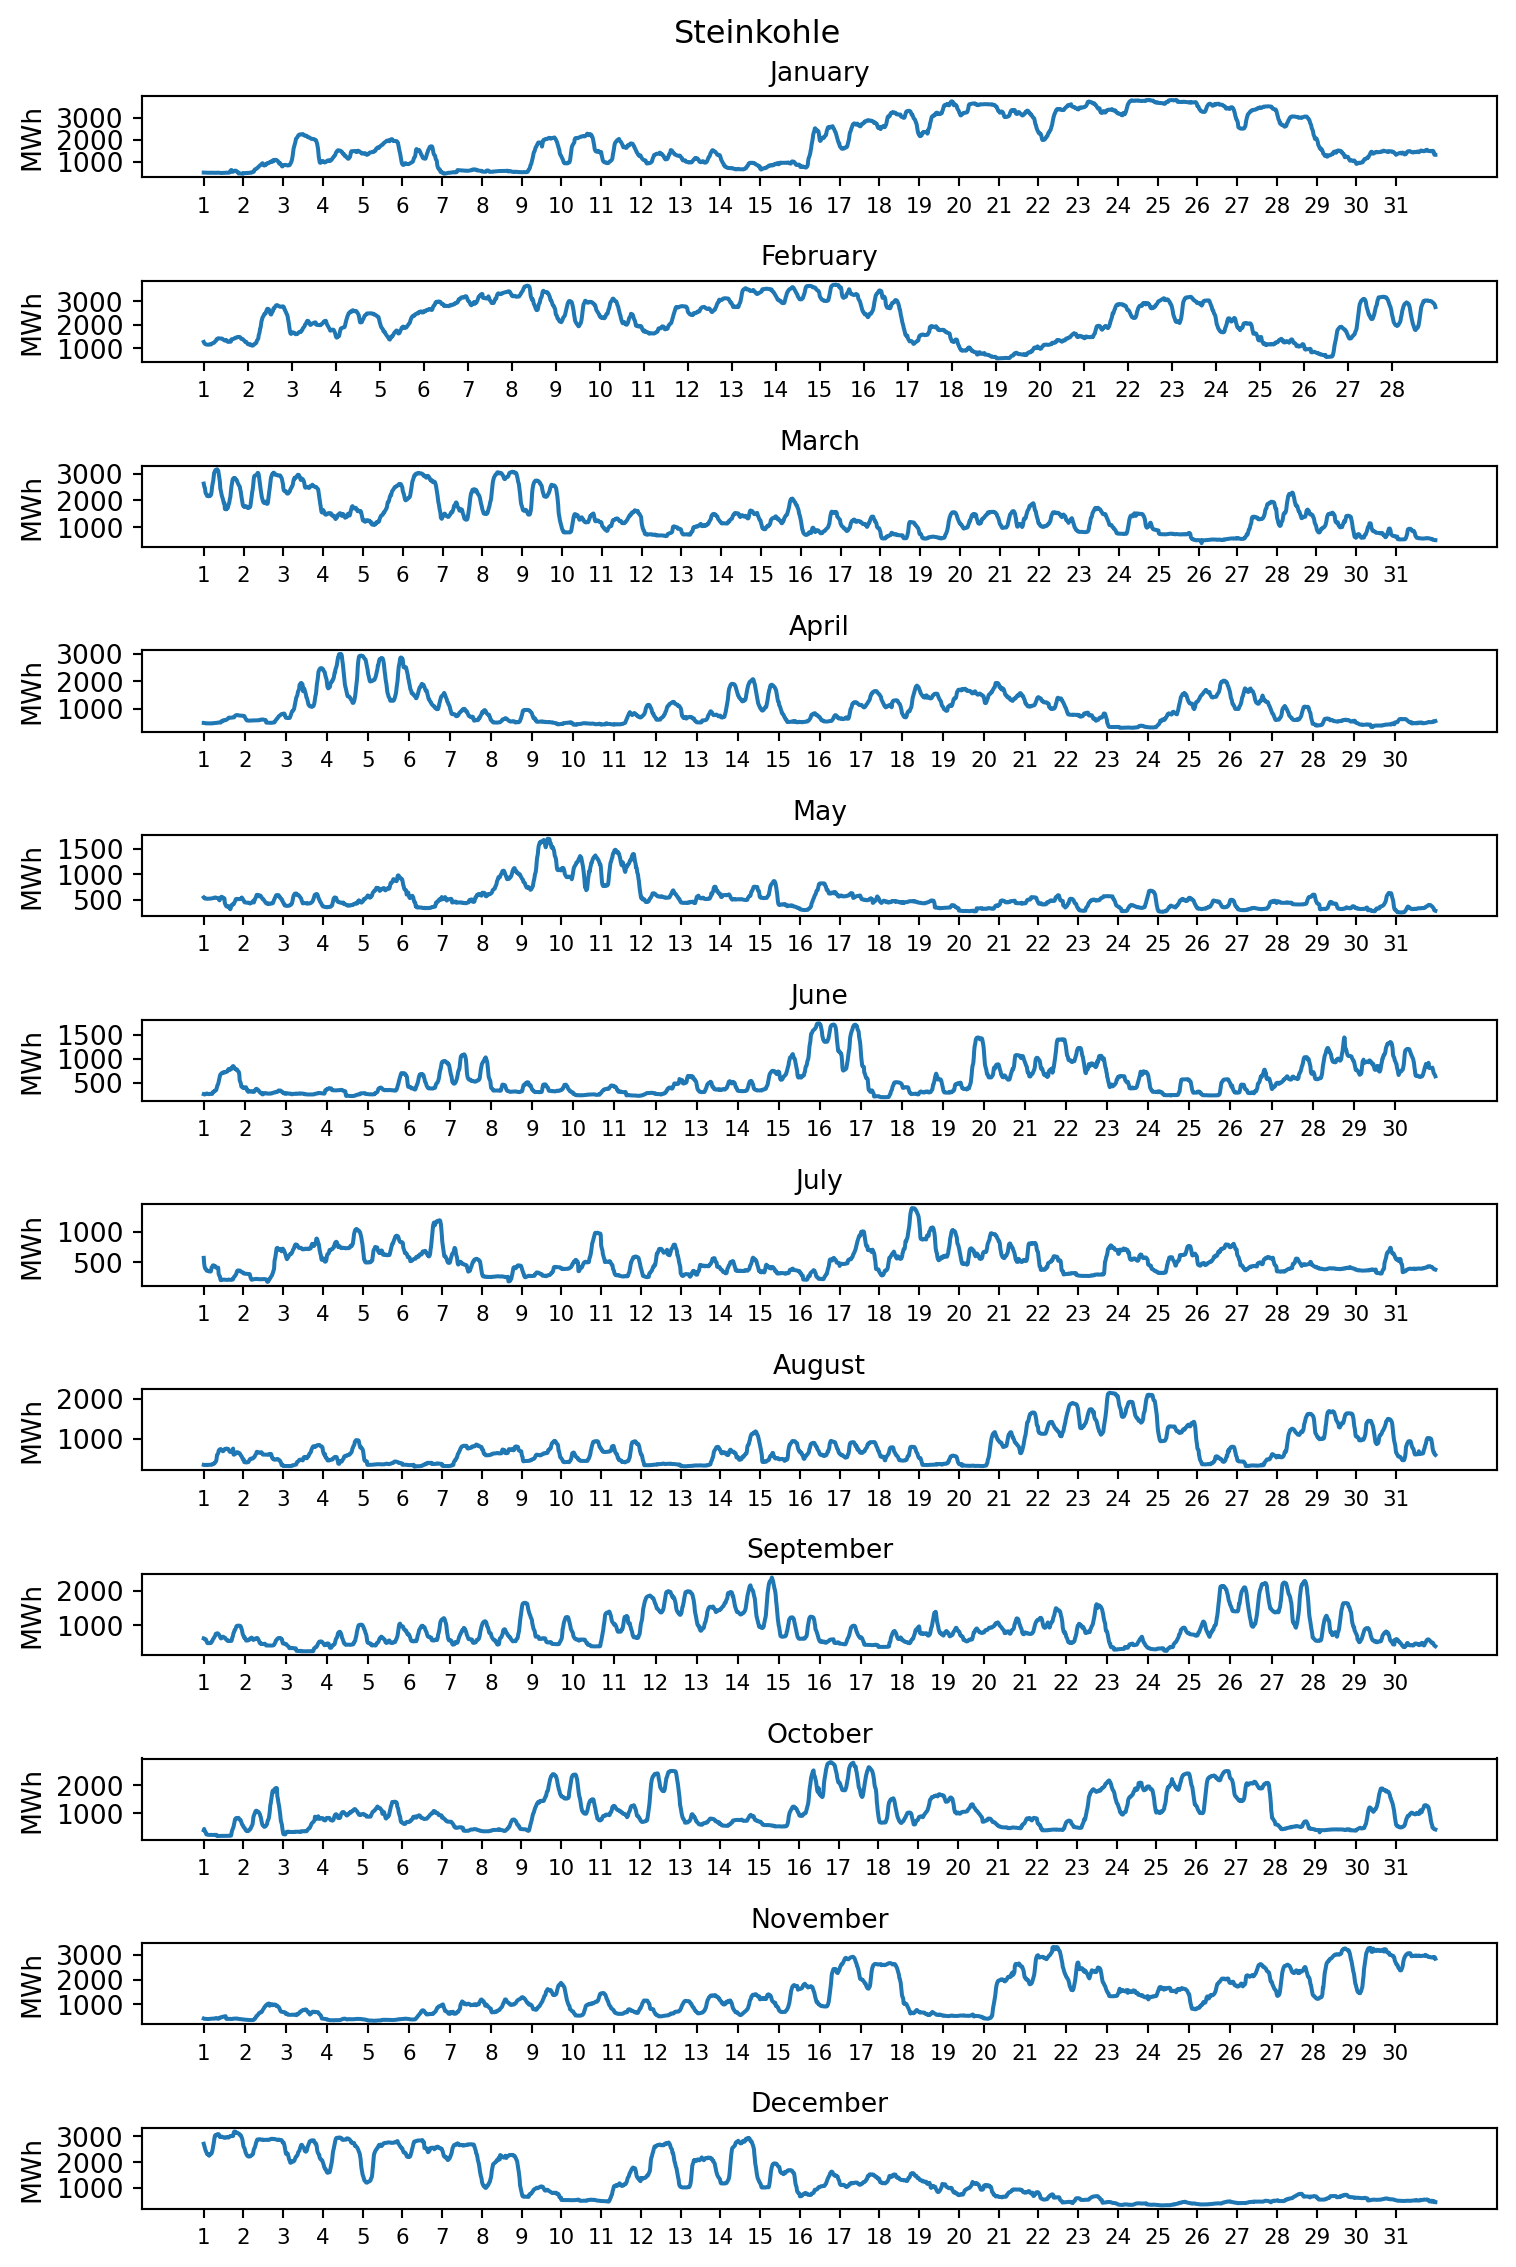

In [32]:
#| echo: false
#| fig-cap: Jahresgang Steinkohle
#| fig-alt: "Der Jahresgang der Stromerzeugung durch Steinkohle wird monatsweise in 12 Grafiken gezeigt. Die Produktionsspitzen erreichen nur selten 3000 MWh je Viertelstunde und dauern nur wenige Stunden an. Es dominieren untertägige An- und Runterfahrzyklen. Häufig sind auch Phasen niedriger Produktion im Bereich von 1000 MWh."
plotting_data = erzeugung.copy()

erzeuger = "Steinkohle"

fig = plt.figure(figsize = (8, 12))
fig.suptitle(erzeuger, fontsize = 12)
for i in range(1, 13):
  plotting_data_monthly = plotting_data[plotting_data['Datum von'].dt.month == i]
  ax = fig.add_subplot(12, 1, i)
  ax.plot(plotting_data_monthly[erzeuger + " [MWh]"])
  ax.set_ylabel(ylabel= "MWh")
 
  # Titel erzeugen
  plt.title(label = plotting_data_monthly['Datum von'].head(1).dt.strftime('%B').item(), fontsize = 10)
  
  # xticks erzeugen
  tage_index = plotting_data_monthly[~plotting_data_monthly["Datum von"].dt.day.duplicated()].index
  tagesnamen = plotting_data_monthly["Datum von"].dt.day.unique() 
  plt.xticks(tage_index, tagesnamen, fontsize = 8)

plt.tight_layout()

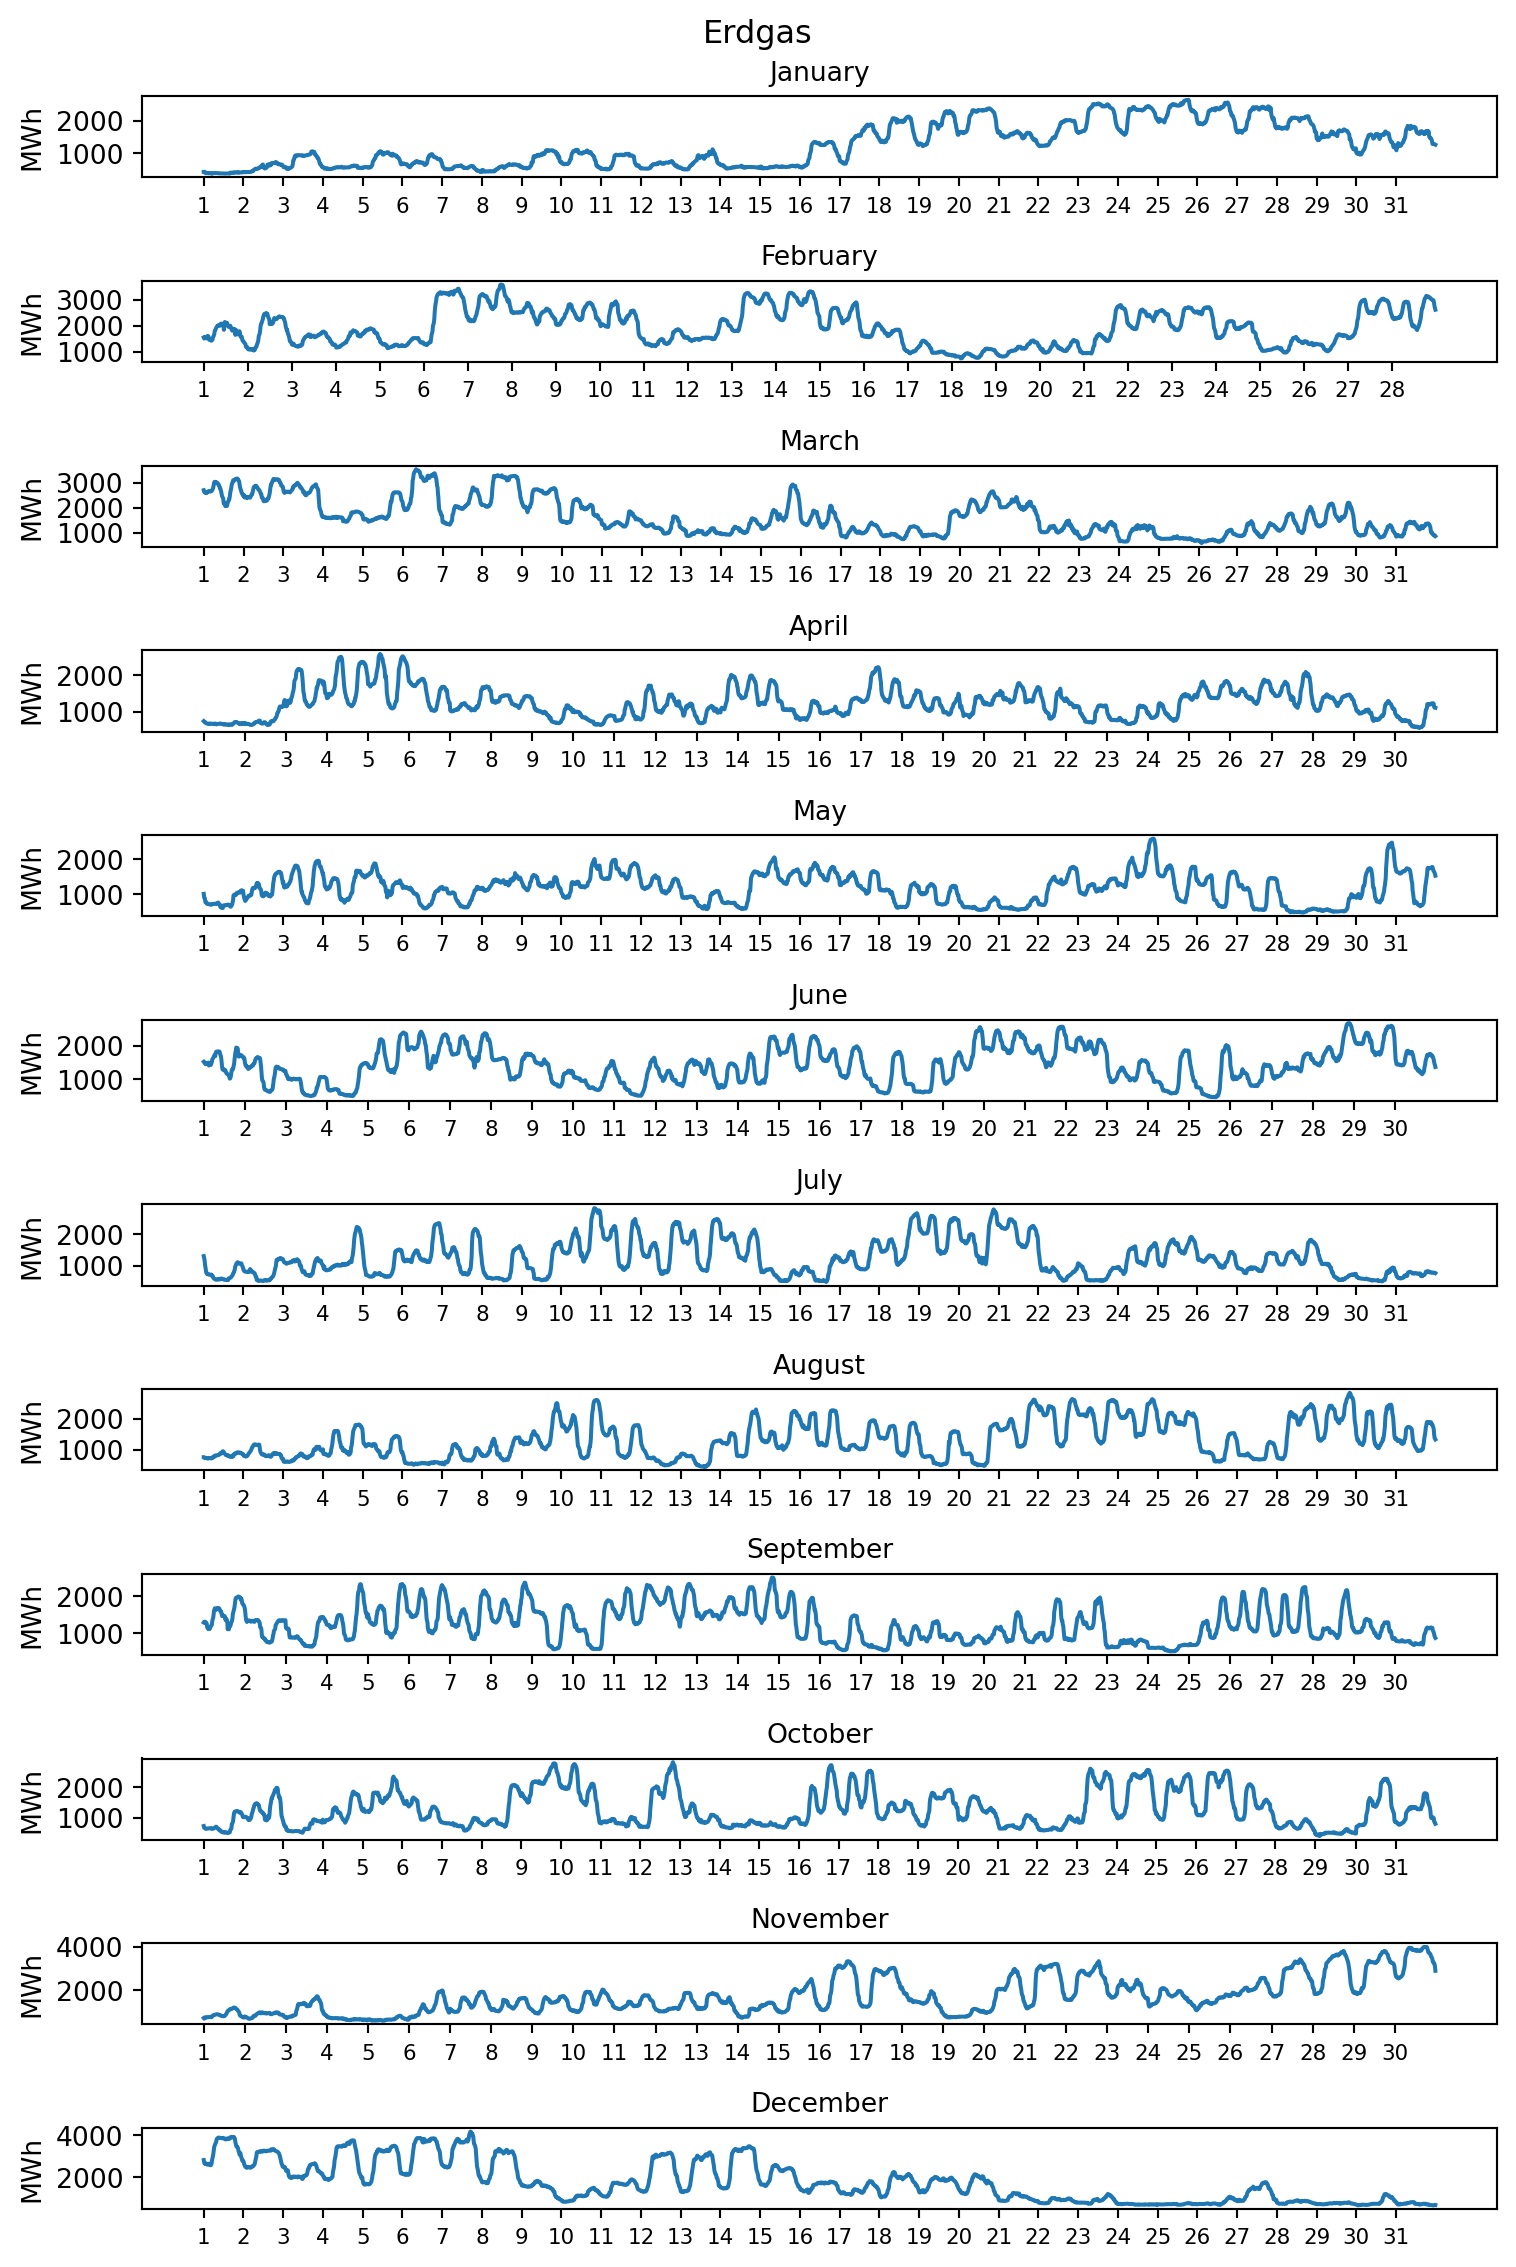

In [33]:
#| echo: false
#| fig-cap: Jahresgang Erdgas
#| fig-alt: "Der Jahresgang der Stromerzeugung durch Erdgas wird monatsweise in 12 Grafiken gezeigt. TODO"
plotting_data = erzeugung.copy()

erzeuger = "Erdgas"

fig = plt.figure(figsize = (8, 12))
fig.suptitle(erzeuger, fontsize = 12)
for i in range(1, 13):
  plotting_data_monthly = plotting_data[plotting_data['Datum von'].dt.month == i]
  ax = fig.add_subplot(12, 1, i)
  ax.plot(plotting_data_monthly[erzeuger + " [MWh]"])
  ax.set_ylabel(ylabel= "MWh")
 
  # Titel erzeugen
  plt.title(label = plotting_data_monthly['Datum von'].head(1).dt.strftime('%B').item(), fontsize = 10)
  
  # xticks erzeugen
  tage_index = plotting_data_monthly[~plotting_data_monthly["Datum von"].dt.day.duplicated()].index
  tagesnamen = plotting_data_monthly["Datum von"].dt.day.unique() 
  plt.xticks(tage_index, tagesnamen, fontsize = 8)

plt.tight_layout()